<b>Section 0</b>: Total prediction process (Visualization)

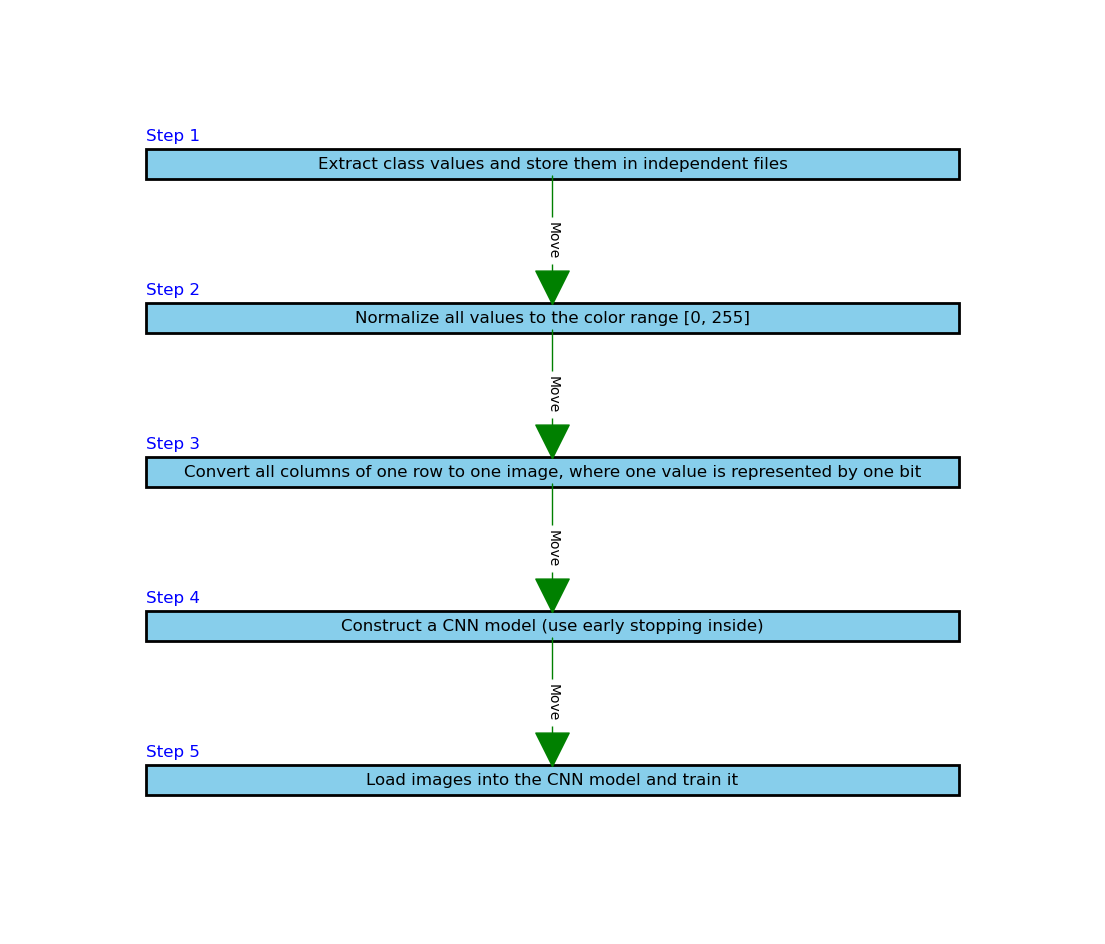

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as patches

G = nx.DiGraph()

nodes = [
    "Extract class values and store them in independent files",
    "Normalize all values to the color range [0, 255]",
    "Convert all columns of one row to one image, where one value is represented by one bit",
    "Construct a CNN model (use early stopping inside)",
    "Load images into the CNN model and train it"
]
G.add_nodes_from(nodes)

edges = [
    ("Extract class values and store them in independent files", 
     "Normalize all values to the color range [0, 255]", "Move"),
    ("Normalize all values to the color range [0, 255]", 
     "Convert all columns of one row to one image, where one value is represented by one bit", "Move"),
    ("Convert all columns of one row to one image, where one value is represented by one bit", 
     "Construct a CNN model (use early stopping inside)", "Move"),
    ("Construct a CNN model (use early stopping inside)", 
     "Load images into the CNN model and train it", "Move")
]

for u, v, label in edges:
    G.add_edge(u, v, label=label)

pos = {
    "Extract class values and store them in independent files": (0, 4),
    "Normalize all values to the color range [0, 255]": (0, 3),
    "Convert all columns of one row to one image, where one value is represented by one bit": (0, 2),
    "Construct a CNN model (use early stopping inside)": (0, 1),
    "Load images into the CNN model and train it": (0, 0)
}

plt.figure(figsize=(14, 12))

node_width = 15000
node_height = 2000
arrow_size = 60

ax = plt.gca()

for node, (x, y) in pos.items():
    rect = patches.Rectangle((x - node_width / 2e4, y - node_height / 2e4), 
                             node_width / 1e4, node_height / 1e4, 
                             edgecolor='black', facecolor='skyblue', linewidth=2)
    ax.add_patch(rect)
    plt.text(x, y, node, fontsize=12, ha='center', va='center', color='black')

for i, (node, (x, y)) in enumerate(pos.items(), start=1):
    plt.text(x - 0.7, y + 0.18, f"Step {i}", fontsize=12, ha='center', va='center', color='blue')

nx.draw_networkx_edges(G, pos, arrowstyle="-|>", arrowsize=arrow_size, edge_color="green")

edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.xlim(-1, 1)
plt.ylim(-1, 5)
plt.axis("off")

plt.show()

<b>Section 1</b>: Preparation steps

In [3]:
import pandas as pd

file_path = 'mixalldata_clean.csv'
df = pd.read_csv(file_path, nrows=1)

print("Column names in the dataset:")
print(df.columns)

Column names in the dataset:
Index(['type', 'sendTime', 'sender', 'senderPseudo', 'messageID', 'class',
       'posx', 'posy', 'posz', 'posx_n', 'posy_n', 'posz_n', 'spdx', 'spdy',
       'spdz', 'spdx_n', 'spdy_n', 'spdz_n', 'aclx', 'acly', 'aclz', 'aclx_n',
       'acly_n', 'aclz_n', 'hedx', 'hedy', 'hedz', 'hedx_n', 'hedy_n',
       'hedz_n'],
      dtype='object')


In [3]:
import pandas as pd

df = pd.read_csv(file_path)
distinct_sender_pseudos = df['senderPseudo'].unique()
count_sender_pseudos = len(distinct_sender_pseudos)

print("Distinct senderPseudo values in the dataset:")
for pseudo in distinct_sender_pseudos:
    print(pseudo)

print("\nTotal number of distinct senderPseudo values:", count_sender_pseudos)
print("Range of senderPseudo values:", df['senderPseudo'].min(), "to", df['senderPseudo'].max())
print("Data type of senderPseudo values:", df['senderPseudo'].dtype)

Distinct senderPseudo values in the dataset:
101301377
101301437
101301617
101301497
201301557
301301557
401301557
501301557
601301557
701301557
801301557
901301557
1001301557
1101301557
1201301557
1301301557
1401301557
1501301557
1601301557
1701301557
1801301557
1901301557
2001301557
2101301557
2201301557
2301301557
2401301557
2501301557
2601301557
2701301557
2801301557
2901301557
3001301557
3101301557
3201301557
3301301557
3401301557
3501301557
3601301557
3701301557
3801301557
3901301557
4001301557
4101301557
4201301557
6334261
106334261
206334261
306334261
406334261
506334261
606334261
706334261
806334261
906334261
1006334261
1106334261
1206334261
1306334261
1406334261
1506334261
1606334261
1706334261
1806334261
1906334261
2006334261
2106334261
101301677
101301737
101301857
101301797
101301917
101301977
101302037
101302097
101302157
101302277
101302457
101302217
101302337
101302397
101302577
201302517
301302517
401302517
501302517
601302517
701302517
801302517
901302517
1001302517
1

830485553
840485553
850485553
860485553
870485553
880485553
890485553
900485553
910485553
920485553
930485553
940485553
950485553
960485553
970485553
980485553
990485553
1000485553
10485553
10485613
10485673
10485733
10485793
10485913
10485853
10486033
10485973
10486153
20486153
30486153
40486153
50486153
60486153
10486093
10486213
10486273
10486333
10486393
10486453
10486513
10486573
10486633
10486693
10486753
10486813
10486873
10486933
10486993
10487053
10487113
10487173
10487233
20487353
30487353
40487353
50487353
60487353
70487353
80487353
90487353
100487353
110487353
120487353
130487353
140487353
150487353
160487353
170487353
180487353
190487353
200487353
210487353
220487353
230487353
240487353
250487353
260487353
270487353
280487353
290487353
300487353
310487353
320487353
330487353
340487353
350487353
360487353
370487353
380487353
390487353
400487353
410487353
420487353
430487353
440487353
450487353
460487353
470487353
480487353
490487353
500487353
510487353
520487353
530487353
5

Range of senderPseudo values: 1 to 4206511862
Data type of senderPseudo values: int64


In [4]:
import pandas as pd

df = pd.read_csv(file_path)
distinct_sender = df['sender'].unique()
count_sender = len(distinct_sender)

print("Distinct sender values in the dataset:")
for sd in distinct_sender:
    print(sd)

print("\nTotal number of distinct sender values:", count_sender)
print("Range of sender values:", df['sender'].min(), "to", df['sender'].max())
print("Data type of sender values:", df['sender'].dtype)

Distinct sender values in the dataset:
130137
130143
130161
130149
130155
130167
130173
130185
130179
130191
130197
130203
130209
130215
130227
130245
130221
130233
130239
130257
130251
130269
130263
130275
130281
130293
130287
130299
130305
130317
130311
130323
130335
130329
130341
130347
130353
130365
130359
130377
130371
130383
130389
130395
130401
130407
130413
130419
130425
130431
130437
130443
130449
130461
130455
130467
130473
130479
130491
130485
130497
130515
130509
130521
130503
130539
130545
130533
130527
130557
130551
130569
130563
130581
130575
130587
130593
130599
130611
130605
130617
130623
130647
130629
130641
130635
130653
130659
130665
130671
130677
130683
130689
130695
130707
130701
130713
130725
130719
130731
130737
130743
130749
130755
130761
130767
130773
130785
130779
130791
130803
130797
130809
130815
130821
130833
130827
130845
130839
130851
130857
130863
130869
130875
130881
130893
130887
130899
130911
130905
130917
130929
130923
130935
130941
130947
130965
13

In [1]:
import pandas as pd

# Load the dataset
file_path = 'mixalldata_clean.csv'
df = pd.read_csv(file_path)

# Specify numeric columns
numeric_columns = [
    'sendTime', 'senderPseudo', 'posx', 'posy', 'posz', 'posx_n', 'posy_n', 'posz_n',
    'spdx', 'spdy', 'spdz', 'spdx_n', 'spdy_n', 'spdz_n',
    'aclx', 'acly', 'aclz', 'aclx_n', 'acly_n', 'aclz_n',
    'hedx', 'hedy', 'hedz', 'hedx_n', 'hedy_n', 'hedz_n', 'class'
]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Sort by 'sender' and 'sendTime' for time-sequential ordering within each sender
df = df.sort_values(by=['senderPseudo', 'sendTime']).reset_index(drop=True)

# Separate filtered records into misbehavior and normal classes
misbehavior_records = df[df['class'] != 0]
normal_records = df[df['class'] == 0]

# Sample 2000 records per misbehavior class, ensuring each sender has at least 5 occurrences
misbehavior_sample = (
    misbehavior_records.groupby('class')
    .apply(lambda x: x.head(2500))
    .reset_index(drop=True)
)

# Calculate the remaining sample size needed from normal records to reach 100,000 total
normal_sample_size = 125000 - len(misbehavior_sample)

# Sample normal records while ensuring each sender occurs at least 5 times
normal_sample = (
    normal_records.groupby('sender')
    .apply(lambda x: x.head(5))  # Take at least 5 records per sender
    .reset_index(drop=True)
)

# If additional normal records are needed, sample from remaining normal records
additional_normal_records_needed = normal_sample_size - len(normal_sample)
if additional_normal_records_needed > 0:
    remaining_normal_sample = (
        normal_records[~normal_records.index.isin(normal_sample.index)]
        .sample(n=additional_normal_records_needed, random_state=42)
    )
    normal_sample = pd.concat([normal_sample, remaining_normal_sample])

# Combine misbehavior and normal samples, and sort by 'sendTime' for a sequential dataset
final_df = pd.concat([normal_sample, misbehavior_sample]).sort_values(by='sendTime').reset_index(drop=True)

# Display final class distribution to verify balance and sender occurrence condition
print("Class distribution in final dataset:")
print(final_df['class'].value_counts())

# Verify each sender appears at least 5 times in the final dataset
sender_occurrences = final_df['sender'].value_counts()
print("All senders have at least 5 occurrences:", (sender_occurrences >= 5).all())

Class distribution in final dataset:
0     85989
18     2500
1      2500
2      2500
3      2500
4      2500
5      2500
6      2500
7      2500
8      2500
19     2500
10     2500
11     2500
12     2500
13     2500
14     2500
15     2500
16     2500
17     2500
9      2500
Name: class, dtype: int64
All senders have at least 5 occurrences: False


In [7]:
# Find all distinct (unique) values in the 'OBU_device_ID' column
distinct_senders = final_df['sender'].unique()

print("Distinct senders:")
print(distinct_senders)
print("Total senders: " + str(len(distinct_senders)))

Distinct senders:
[    93    213    303    471    531    663    735    789    855    915
    921    975   1113   1269   1287   1293   1323   1491   1521   1557
   1671   1731   1815   1851   1869   1875   2049   2055   2115   2139
   2235   2265   2325   2373   2493   2571   2751   2871   3069   3081
   3135   3333   3423   3549   3753   3891   4131   4815   4851   4893
   5031   5235   5613   6243   6375   7203   7209   7323   7623   7905
   8025   8067   8703   8763   8883   9297   9489   9957   9981  10863
  11085  11121  11601  12165  12747  12885  13143  13239  13329  13629
  13947  14439  14445  14451  14559  14577  14763  14895  14961  15003
  15117  15147  15807  15819  15825  16305  16605  16995  17247  17883
  17997  18279  18339  18387  18873  19059  19125  19275  19809  19935
  20175  20253  20337  20589  20625  20655  20703  20925  21501  21921
  21981  22095  22377  22521  22557  23385  24009  24129  24159  24243
  24267  24441  24699  25197  25209  25641  25707  25779  2

In [8]:
# Display the first 10 records with sender and sendTime
pd.set_option('display.float_format', '{:.0f}'.format)
print(df[['sender', 'sendTime']].head(10))

   sender  sendTime
0       9       241
1       9       242
2       9       243
3       9       244
4       9       245
5       9       246
6       9       247
7       9       248
8       9       249
9       9       250


<b>Section 2</b>: Execution

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import precision_score, recall_score, f1_score

features = ['posx', 'posy', 'spdx', 'spdy', 'spdx_n', 'spdy_n', 'aclx', 'acly', 'hedx', 'hedy', 'hedx_n', 'hedy_n']
X = df[features].values
Y = (df['class'] != 0).astype(int).values

sequence_length = len(features)
X = X.reshape(-1, sequence_length, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=2, batch_size=32, validation_split=0.2)

Y_pred = model.predict(X_test)
Y_pred_binary = (Y_pred > 0.5).astype(int)

accuracy = accuracy_score(Y_test, Y_pred_binary)
precision = precision_score(Y_test, Y_pred_binary)
recall = recall_score(Y_test, Y_pred_binary)
f1 = f1_score(Y_test, Y_pred_binary)

print("CNN Accuracy:", accuracy)
print("CNN Precision:", precision)
print("CNN Recall:", recall)
print("CNN F1-score:", f1)

Epoch 1/2


C:\Users\david\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


63897/63897 ━━━━━━━━━━━━━━━━━━━━ 149s 2ms/step - accuracy: 0.7333 - loss: 0.5915 - val_accuracy: 0.7857 - val_loss: 0.4670
Epoch 2/2
63897/63897 ━━━━━━━━━━━━━━━━━━━━ 153s 2ms/step - accuracy: 0.7876 - loss: 0.4658 - val_accuracy: 0.7911 - val_loss: 0.4617
19968/19968 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step
CNN Accuracy: 0.7927357182430254
CNN Precision: 0.9699254836860637
CNN Recall: 0.5036704588943395
CNN F1-score: 0.6630349600529235


In [30]:
import numpy as np

start_time = time.time()
random_index = np.random.randint(0, len(X_test))

sample = X_test[random_index].reshape(1, -1, 1)
true_label = Y_test[random_index]

predicted_label = model.predict(sample)
predicted_label_binary = (predicted_label > 0.5).astype(int)

print("Randomly selected sample:")
print(f"True label: {true_label}")
print(f"Predicted label: {predicted_label_binary[0][0]}")

end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nTraining time: {elapsed_time:.6f} seconds")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Randomly selected sample:
True label: 0
Predicted label: 0

Training time: 0.058954 seconds


In [31]:
import time
from sklearn.metrics import precision_score, recall_score, f1_score

TIME_THRESHOLD = 0.1

total_samples_processed = 500
correct_predictions = 0
predictions_above_threshold = 0
prediction_times = []
true_labels = []
predicted_labels = []

for _ in range(total_samples_processed):
    random_index = np.random.randint(0, len(X_test))

    sample = X_test[random_index].reshape(1, -1, 1)
    true_label = Y_test[random_index]

    start_time = time.time()

    predicted_label = model.predict(sample)
    predicted_label_binary = (predicted_label > 0.5).astype(int)

    end_time = time.time()
    prediction_time = end_time - start_time
    prediction_times.append(prediction_time)

    if true_label == predicted_label_binary[0][0]:
        correct_predictions += 1

    if prediction_time >= TIME_THRESHOLD:
        predictions_above_threshold += 1

    true_labels.append(true_label)
    predicted_labels.append(predicted_label_binary[0][0])

accuracy = correct_predictions / total_samples_processed
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

average_prediction_time = np.mean(prediction_times)

print(f"Classification Accuracy: {accuracy:.2f}")
print(f"Classification Precision: {precision:.2f}")
print(f"Classification Recall: {recall:.2f}")
print(f"Classification F1-Score: {f1:.2f}")
print(f"Average Prediction Time: {average_prediction_time:.6f} seconds")
print(f"Predictions with time >= {TIME_THRESHOLD}s: {predictions_above_threshold} out of {total_samples_processed}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━

In [5]:
import numpy as np
import pandas as pd
from PIL import Image
import os

final_numeric_columns = [
    'sendTime', 'senderPseudo', 'posx', 'posy', 'posx_n', 'posy_n',
    'spdx_n', 'spdy_n', 'aclx_n', 'acly_n', 'hedx_n', 'hedy_n'
]

min_max_values = {
    col: (final_df[col].min(), final_df[col].max()) for col in final_numeric_columns if col != 'class'
}

FAC_IMAGE_WIDTH = 5
FAC_IMAGE_HEIGHT = 5
FAC_NUM_CHANNELS = 12
FAC_SPECIAL_VALUE = 255

def normalize_and_scale(value, min_value, max_value):
    if pd.isna(value) or not np.isfinite(value):
        return FAC_SPECIAL_VALUE
    if max_value == min_value:
        return 0 if value == min_value else FAC_SPECIAL_VALUE
    scaled_value = 255 * (value - min_value) / (max_value - min_value)
    return int(np.clip(scaled_value, 0, 255))

def records_to_image_v4(group, misbehavior_index=None):
    image_data = np.zeros((FAC_IMAGE_HEIGHT, FAC_IMAGE_WIDTH, FAC_NUM_CHANNELS), dtype=np.uint8)
    obu_ids = np.empty((FAC_IMAGE_HEIGHT, FAC_IMAGE_WIDTH), dtype=object)
    timestamps = np.empty((FAC_IMAGE_HEIGHT, FAC_IMAGE_WIDTH), dtype=object)

    if len(group) < FAC_IMAGE_WIDTH * FAC_IMAGE_HEIGHT:
        print(f"Not enough rows in the group (needed {FAC_IMAGE_WIDTH * FAC_IMAGE_HEIGHT}, got {len(group)}). Returning an empty image.")
        return np.full((FAC_IMAGE_HEIGHT, FAC_IMAGE_WIDTH, FAC_NUM_CHANNELS), FAC_SPECIAL_VALUE, dtype=np.uint8), obu_ids, timestamps

    unique_senders = group['senderPseudo'].unique()

    for row_index in range(FAC_IMAGE_HEIGHT):
        is_misbehavior_row = misbehavior_index is not None and (row_index * FAC_IMAGE_WIDTH <= misbehavior_index - 1 < (row_index + 1) * FAC_IMAGE_WIDTH)

        if is_misbehavior_row:
            misbehavior_row = group.sample(n=1).iloc[0]
            selected_sender = misbehavior_row['senderPseudo']

            sender_records = group[group['senderPseudo'] == selected_sender]
            if len(sender_records) < 5:
                sender_records = sender_records.sample(n=5, replace=True, random_state=row_index)

            sender_records = sender_records.reset_index(drop=True)

            for col_index in range(FAC_IMAGE_WIDTH):
                for channel_index, col in enumerate(final_numeric_columns):
                    min_value, max_value = min_max_values[col]
                    value = normalize_and_scale(sender_records.iloc[col_index][col], min_value, max_value)
                    image_data[row_index, col_index, channel_index] = value

                obu_ids[row_index, col_index] = selected_sender
                timestamps[row_index, col_index] = misbehavior_row['sendTime'] + col_index

            misbehavior_col = (misbehavior_index - 1) % FAC_IMAGE_WIDTH
            for channel_index in range(3):
                col = final_numeric_columns[channel_index]
                min_value, max_value = min_max_values[col]
                value = normalize_and_scale(misbehavior_row[col], min_value, max_value)
                image_data[row_index, misbehavior_col, channel_index] = value

        else:
            selected_sender = np.random.choice(unique_senders)
            sender_records = group[group['senderPseudo'] == selected_sender]
            if len(sender_records) < 5:
                sender_records = sender_records.sample(n=5, replace=True, random_state=row_index)

            sender_records = sender_records.sort_values('sendTime').reset_index(drop=True)

            base_time = sender_records.iloc[0]['sendTime']
            for col_index in range(FAC_IMAGE_WIDTH):
                for channel_index, col in enumerate(final_numeric_columns):
                    min_value, max_value = min_max_values[col]
                    value = normalize_and_scale(sender_records.iloc[col_index][col], min_value, max_value)
                    image_data[row_index, col_index, channel_index] = value
                    
                obu_ids[row_index, col_index] = selected_sender
                timestamps[row_index, col_index] = base_time + col_index

    return image_data, obu_ids, timestamps

normal_messages = final_df[final_df['class'] == 0]
attack_messages = final_df[final_df['class'] != 0]

output_dir = 'veremi_images_5x5_e'
os.makedirs(output_dir, exist_ok=True)

# Step 1: Create 1120 normal images, sorting by timestamp and keeping rows from the same sender
image_counter = 1
classification_results = []

normal_samples = normal_messages.groupby('sender').apply(lambda x: x.sample(n=25, replace=True)).reset_index(drop=True)

while len(classification_results) < 2500:
    rows_group = normal_samples.sort_values('sendTime')

    if len(rows_group) < 25:
        continue

    image_data, obu_ids, timestamps = records_to_image_v4(rows_group)
    
    image_name = f'{output_dir}/image_{image_counter}.png'
    Image.fromarray(image_data[:, :, :3], mode='RGB').save(image_name)

    classification_results.append({'image_name': image_name, 'classification': 0, 'misbehavior_index': 0})
    image_counter += 1

# Step 2: Create 480 images with mixed normal and attack rows
for i in range(5700):
    normal_sampled_senders = normal_samples.sample(n=25, random_state=i)
    attack_messages_sample = attack_messages.sample(n=25, random_state=i)
    
    rows_group = pd.concat([normal_sampled_senders, attack_messages_sample]).sort_values('sendTime')

    misbehavior_index = np.random.randint(1, 26)

    image_data, obu_ids, timestamps = records_to_image_v4(rows_group, misbehavior_index)

    image_name = f'{output_dir}/image_{image_counter}.png'
    Image.fromarray(image_data[:, :, :3], mode='RGB').save(image_name)
    
    classification_results.append({'image_name': image_name, 'classification': 1, 'misbehavior_index': misbehavior_index})  # Misbehavior images have indices 1-25
    image_counter += 1

classification_df = pd.DataFrame(classification_results)
classification_df.to_csv('class_5x5_e.csv', index=False)

print("New classification results saved to 'class_5x5_e.csv'.") 

New classification results saved to 'class_5x5_e.csv'.


In [4]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os
import time

FAC_IMAGE_SIZE = (5, 5, 12)
FAC_IMAGE_DIR = 'veremi_images_5x5_e'
FAC_BATCH_SIZE = 32
FAC_EPOCHS = 10

fac_labels_df = pd.read_csv('class_5x5_e.csv')
fac_labels_df['classification'].fillna(-1, inplace=True)
fac_labels_df['misbehavior_index'].fillna(-1, inplace=True)

fac_labels = fac_labels_df[['classification']].values

valid_indices = (fac_labels[:, 0] != -1)
fac_labels = fac_labels[valid_indices]
fac_num_images = len(fac_labels)

def load_images(fac_image_dir, fac_num_images):
    X = []
    Y_classification = []
    
    for idx in range(fac_num_images):
        image_path = os.path.join(fac_image_dir, f'image_{idx + 1}.png')
        if os.path.exists(image_path):
            image = load_img(image_path, color_mode='grayscale', target_size=(FAC_IMAGE_SIZE[0], FAC_IMAGE_SIZE[1]))
            image_array = img_to_array(image) / 255.0
            if image_array.shape[-1] == 1:
                image_array = np.concatenate([image_array] * 11, axis=-1)
            X.append(image_array)
            Y_classification.append(int(fac_labels[idx][0]))
        else:
            print(f"Warning: {image_path} not found.")
    
    return np.array(X, dtype=np.float32), np.array(Y_classification, dtype=int)

X, Y_classification = load_images(FAC_IMAGE_DIR, fac_num_images)

X_train, X_test, Y_train_classification, Y_test_classification = train_test_split(
    X, Y_classification, test_size=0.2, random_state=42)

input_layer = Input(shape=(FAC_IMAGE_SIZE[0], FAC_IMAGE_SIZE[1], 11))

x = Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(input_layer)
x = BatchNormalization()(x)
x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)

classification_output = Dense(2, activation='softmax', name='classification_output')(x)

model = Model(inputs=input_layer, outputs=classification_output)

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

start_time = time.time()
model.fit(X_train, 
          Y_train_classification, 
          epochs=FAC_EPOCHS, 
          batch_size=FAC_BATCH_SIZE, 
          validation_data=(X_test, Y_test_classification),
          callbacks=[early_stopping])

predictions = model.predict(X_test)
Y_pred_classification = np.argmax(predictions, axis=1)

accuracy_classification = accuracy_score(Y_test_classification, Y_pred_classification)
precision_classification = precision_score(Y_test_classification, Y_pred_classification, average='macro')
recall_classification = recall_score(Y_test_classification, Y_pred_classification, average='macro')
f1_classification = f1_score(Y_test_classification, Y_pred_classification, average='macro')

print("Classification Accuracy:", accuracy_classification)
print("Classification Precision:", precision_classification)
print("Classification Recall:", recall_classification)
print("Classification F1-score (sklearn):", f1_classification)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nTraining time: {elapsed_time:.6f} seconds")

Epoch 1/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.7489 - loss: 0.6522 - val_accuracy: 0.3537 - val_loss: 1.2160
Epoch 2/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8118 - loss: 0.4013 - val_accuracy: 0.7396 - val_loss: 0.5348
Epoch 3/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8326 - loss: 0.3685 - val_accuracy: 0.8348 - val_loss: 0.3790
Epoch 4/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8368 - loss: 0.3556 - val_accuracy: 0.8372 - val_loss: 0.3703
Epoch 5/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8399 - loss: 0.3681 - val_accuracy: 0.8220 - val_loss: 0.3837
Epoch 6/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8330 - loss: 0.3573 - val_accuracy: 0.8341 - val_loss: 0.3727
Epoch 7/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8396 - loss: 0.3499 - val_accuracy: 0.8530 - val_loss: 0.3540
Epoch 8/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8483 - loss: 0.3509 - val_accu

In [4]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os
import time

FAC_IMAGE_SIZE = (5, 5, 12)
FAC_IMAGE_DIR = 'veremi_images_5x5_e'
FAC_BATCH_SIZE = 32
FAC_EPOCHS = 10

fac_labels_df = pd.read_csv('class_5x5_e.csv')
fac_labels_df['classification'].fillna(-1, inplace=True)
fac_labels_df['misbehavior_index'].fillna(-1, inplace=True)

fac_labels = fac_labels_df[['classification']].values
valid_indices = (fac_labels[:, 0] != -1)
fac_labels = fac_labels[valid_indices]
fac_num_images = len(fac_labels)

def load_images(fac_image_dir, fac_num_images):
    X, Y_classification = [], []
    for idx in range(fac_num_images):
        image_path = os.path.join(fac_image_dir, f'image_{idx + 1}.png')
        if os.path.exists(image_path):
            image = load_img(image_path, color_mode='grayscale', target_size=(FAC_IMAGE_SIZE[0], FAC_IMAGE_SIZE[1]))
            image_array = img_to_array(image) / 255.0
            if image_array.shape[-1] == 1:
                image_array = np.concatenate([image_array] * 11, axis=-1)
            X.append(image_array)
            Y_classification.append(int(fac_labels[idx][0]))
    return np.array(X, dtype=np.float32), np.array(Y_classification, dtype=int)

X, Y_classification = load_images(FAC_IMAGE_DIR, fac_num_images)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accs, precs, recs, f1s = [], [], [], []
start_time = time.time()
fold = 1

for train_index, test_index in skf.split(X, Y_classification):
    X_train, X_test = X[train_index], X[test_index]
    Y_train_classification, Y_test_classification = Y_classification[train_index], Y_classification[test_index]

    input_layer = Input(shape=(FAC_IMAGE_SIZE[0], FAC_IMAGE_SIZE[1], 11))
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    classification_output = Dense(2, activation='softmax')(x)
    model = Model(inputs=input_layer, outputs=classification_output)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    model.fit(X_train, Y_train_classification, epochs=FAC_EPOCHS, batch_size=FAC_BATCH_SIZE,
              validation_data=(X_test, Y_test_classification), callbacks=[early_stopping], verbose=0)

    predictions = model.predict(X_test, verbose=0)
    Y_pred_classification = np.argmax(predictions, axis=1)

    accuracy_classification = accuracy_score(Y_test_classification, Y_pred_classification)
    precision_classification = precision_score(Y_test_classification, Y_pred_classification, average='macro', zero_division=0)
    recall_classification = recall_score(Y_test_classification, Y_pred_classification, average='macro', zero_division=0)
    f1_classification = f1_score(Y_test_classification, Y_pred_classification, average='macro', zero_division=0)

    print(f"Fold {fold} - Accuracy: {accuracy_classification:.4f}, Precision: {precision_classification:.4f}, Recall: {recall_classification:.4f}, F1: {f1_classification:.4f}")
    accs.append(accuracy_classification)
    precs.append(precision_classification)
    recs.append(recall_classification)
    f1s.append(f1_classification)
    fold += 1

print("\nCross Validation Results:")
print(f"Accuracy: Mean={np.mean(accs):.4f}, Std={np.std(accs):.4f}")
print(f"Precision: Mean={np.mean(precs):.4f}, Std={np.std(precs):.4f}")
print(f"Recall: Mean={np.mean(recs):.4f}, Std={np.std(recs):.4f}")
print(f"F1-score: Mean={np.mean(f1s):.4f}, Std={np.std(f1s):.4f}")

end_time = time.time()
print(f"\nTotal Training time: {end_time - start_time:.6f} seconds")

Fold 1 - Accuracy: 0.8591, Precision: 0.8329, Recall: 0.8369, F1: 0.8349
Fold 2 - Accuracy: 0.8537, Precision: 0.8311, Recall: 0.8178, F1: 0.8239
Fold 3 - Accuracy: 0.8524, Precision: 0.8294, Recall: 0.8169, F1: 0.8227
Fold 4 - Accuracy: 0.8329, Precision: 0.8015, Recall: 0.8130, F1: 0.8067
Fold 5 - Accuracy: 0.8457, Precision: 0.8246, Recall: 0.8020, F1: 0.8117

Cross Validation Results:
Accuracy: Mean=0.8488, Std=0.0090
Precision: Mean=0.8239, Std=0.0115
Recall: Mean=0.8173, Std=0.0113
F1-score: Mean=0.8200, Std=0.0099

Total Training time: 166.910176 seconds


In [5]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import os
import random
from tensorflow.keras.models import load_model
import time

start_time = time.time()

FAC_IMAGE_DIR = 'veremi_images_5x5_e'
FAC_LABELS_CSV = 'class_5x5_e.csv'

fac_labels_df = pd.read_csv(FAC_LABELS_CSV)

fac_labels_df['classification'].fillna(-1, inplace=True)

valid_indices = (fac_labels_df['classification'] != -1)
valid_labels = fac_labels_df[valid_indices]

random_index = random.choice(valid_labels.index)
selected_label = valid_labels.loc[random_index]
selected_image_path = os.path.join(FAC_IMAGE_DIR, f'image_{random_index + 1}.png')

image = load_img(selected_image_path, color_mode='grayscale', target_size=(FAC_IMAGE_SIZE[0], FAC_IMAGE_SIZE[1]))
image_array = img_to_array(image) / 255.0

image_array = np.concatenate([image_array] * 11, axis=-1)
image_array = np.expand_dims(image_array, axis=0)

predictions = model.predict(image_array)
predicted_classification = np.argmax(predictions, axis=1)[0]

print(f"Selected Image Path: {selected_image_path}")
print(f"True Classification: {selected_label['classification']}")
print(f"Predicted Classification: {predicted_classification}")

end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nElapsed time: {elapsed_time:.6f} seconds")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Selected Image Path: veremi_images_5x5_e\image_949.png
True Classification: 0
Predicted Classification: 0

Elapsed time: 0.103622 seconds


In [6]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import load_model
import os
import random
import time

FAC_IMAGE_SIZE = (5, 5, 12)
FAC_IMAGE_DIR = 'veremi_images_5x5_e'
FAC_LABELS_CSV = 'class_5x5_e.csv'
NUM_SAMPLES = 500
TIME_THRESHOLD = 0.1

fac_labels_df = pd.read_csv(FAC_LABELS_CSV)
fac_labels_df['classification'].fillna(-1, inplace=True)
valid_indices = (fac_labels_df['classification'] != -1)
valid_labels = fac_labels_df[valid_indices]

total_classification_correct = 0
total_prediction_time = 0.0
predictions_above_threshold = 0
num_classes = valid_labels['classification'].nunique()

confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

true_classifications = []
predicted_classifications = []

for _ in range(NUM_SAMPLES):
    random_index = random.choice(valid_labels.index)
    selected_label = valid_labels.loc[random_index]
    selected_image_path = os.path.join(FAC_IMAGE_DIR, f'image_{random_index + 1}.png')

    if not os.path.exists(selected_image_path):
        print(f"Error: Selected image {selected_image_path} does not exist. Skipping.")
        continue

    image = load_img(selected_image_path, color_mode='grayscale', target_size=(FAC_IMAGE_SIZE[0], FAC_IMAGE_SIZE[1]))
    image_array = img_to_array(image) / 255.0
    image_array = np.concatenate([image_array] * 11, axis=-1)
    image_array = np.expand_dims(image_array, axis=0)

    start_time = time.time()
    predictions = model.predict(image_array)
    end_time = time.time()

    prediction_time = end_time - start_time
    total_prediction_time += prediction_time

    if prediction_time >= TIME_THRESHOLD:
        predictions_above_threshold += 1

    predicted_classification = np.argmax(predictions, axis=1)[0]
    true_classification = int(selected_label['classification'])

    confusion_matrix[true_classification, predicted_classification] += 1

    if predicted_classification == true_classification:
        total_classification_correct += 1

    true_classifications.append(true_classification)
    predicted_classifications.append(predicted_classification)

classification_accuracy = total_classification_correct / NUM_SAMPLES
average_prediction_time = total_prediction_time / NUM_SAMPLES

precision_per_class = np.zeros(num_classes)
recall_per_class = np.zeros(num_classes)
f1_score_per_class = np.zeros(num_classes)

for i in range(num_classes):
    tp = confusion_matrix[i, i]
    fp = confusion_matrix[:, i].sum() - tp
    fn = confusion_matrix[i, :].sum() - tp

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    precision_per_class[i] = precision
    recall_per_class[i] = recall
    f1_score_per_class[i] = f1_score

classification_precision = np.average(precision_per_class, weights=confusion_matrix.sum(axis=1))
classification_recall = np.average(recall_per_class, weights=confusion_matrix.sum(axis=1))
classification_f1 = np.average(f1_score_per_class, weights=confusion_matrix.sum(axis=1))

print(f"Classification Accuracy: {classification_accuracy:.2f}")
print(f"Classification Precision: {classification_precision:.2f}")
print(f"Classification Recall: {classification_recall:.2f}")
print(f"Classification F1-Score: {classification_f1:.2f}")
print(f"Average Prediction Time: {average_prediction_time:.6f} seconds")
print(f"Predictions with time >= {TIME_THRESHOLD}s: {predictions_above_threshold} out of {NUM_SAMPLES}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━

In [21]:
import numpy as np
import pandas as pd
import os

# Constants
FAC_IMAGE_WIDTH = 5
FAC_IMAGE_HEIGHT = 5
FAC_NUM_CHANNELS = 12
FAC_SPECIAL_VALUE = 255

def normalize_and_scale(values, min_values, max_values):
    scaled = 255 * (values - min_values) / (max_values - min_values)
    scaled[np.isnan(values) | ~np.isfinite(values)] = FAC_SPECIAL_VALUE
    scaled[values == max_values] = 0
    return np.clip(scaled, 0, 255).astype(np.uint8)

def generate_image(group, misbehavior_index=None):
    min_values = np.array([group[col].min() for col in final_numeric_columns])
    max_values = np.array([group[col].max() for col in final_numeric_columns])

    data = group[final_numeric_columns].to_numpy()
    normalized_data = normalize_and_scale(data, min_values, max_values)

    reshaped_data = normalized_data.reshape(FAC_IMAGE_HEIGHT, FAC_IMAGE_WIDTH, FAC_NUM_CHANNELS)

    if misbehavior_index:
        row = (misbehavior_index - 1) // FAC_IMAGE_WIDTH
        col = (misbehavior_index - 1) % FAC_IMAGE_WIDTH
        reshaped_data[row, col, :2] = [255, 0]
        
    return reshaped_data

final_numeric_columns = [
    'sendTime', 'sender', 'posx', 'posy', 'posx_n', 'posy_n',
    'spdx_n', 'spdy_n', 'aclx_n', 'acly_n', 'hedx_n', 'hedy_n'
]

output_dir = 'veremi_images_5x5_ea'
os.makedirs(output_dir, exist_ok=True)

normal_messages = final_df[final_df['class'] == 0]
attack_messages = final_df[final_df['class'] == 1]

classification_results = []
image_counter = 1

for _ in range(2500):
    sampled_group = normal_messages.sample(n=FAC_IMAGE_WIDTH * FAC_IMAGE_HEIGHT, random_state=image_counter)
    image_data = generate_image(sampled_group)
    npy_name = f'{output_dir}/image_{image_counter}.npy'
    np.save(npy_name, image_data)
    classification_results.append({'file_name': npy_name, 'classification': 0, 'misbehavior_index': 0})
    image_counter += 1

for _ in range(5700):
    normal_group = normal_messages.sample(n=20, random_state=image_counter)
    attack_group = attack_messages.sample(n=5, random_state=image_counter)
    combined_group = pd.concat([normal_group, attack_group])
    misbehavior_index = np.random.randint(1, FAC_IMAGE_WIDTH * FAC_IMAGE_HEIGHT + 1)
    image_data = generate_image(combined_group, misbehavior_index)
    npy_name = f'{output_dir}/image_{image_counter}.npy'
    np.save(npy_name, image_data)
    classification_results.append({'file_name': npy_name, 'classification': 1, 'misbehavior_index': misbehavior_index})
    image_counter += 1

classification_df = pd.DataFrame(classification_results)
classification_df.to_csv('class_5x5_ea.csv', index=False)

print("Images generated and saved to 'veremi_images_5x5_ea'.")

Images generated and saved to 'veremi_images_5x5_ea'.


In [8]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os
import time

FAC_IMAGE_SIZE = (5, 5, 12)
FAC_IMAGE_DIR = 'veremi_images_5x5_ea'
FAC_BATCH_SIZE = 32
FAC_EPOCHS = 10

fac_labels_df = pd.read_csv('class_5x5_ea.csv')

fac_labels_df['classification'].fillna(-1, inplace=True)

fac_labels = fac_labels_df[['classification']].values

valid_indices = (fac_labels[:, 0] != -1)
fac_labels = fac_labels[valid_indices]
fac_num_images = len(fac_labels)

def load_images(fac_image_dir, fac_num_images):
    X = []
    Y_classification = []
    
    for idx in range(fac_num_images):
        image_path = os.path.join(fac_image_dir, f'image_{idx + 1}.npy')
        if os.path.exists(image_path):
            image_array = np.load(image_path)
            image_array = image_array / 255.0

            X.append(image_array)
            Y_classification.append(int(fac_labels[idx][0]))
        else:
            print(f"Warning: {image_path} not found.")
    
    X = np.array(X, dtype=np.float32)
    Y_classification = np.array(Y_classification, dtype=int)

    return X, Y_classification

X, Y_classification = load_images(FAC_IMAGE_DIR, fac_num_images)

X_train, X_test, Y_train_classification, Y_test_classification = train_test_split(
    X, Y_classification, test_size=0.2, random_state=42)

input_layer = Input(shape=(FAC_IMAGE_SIZE[0], FAC_IMAGE_SIZE[1], 12))

x = Conv2D(filters=128, kernel_size=(1, 1), activation='relu', padding='same')(input_layer)
x = BatchNormalization()(x)
x = Conv2D(filters=64, kernel_size=(1, 1), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(192, activation='relu')(x)
x = BatchNormalization()(x)

classification_output = Dense(2, activation='softmax', name='classification_output')(x)

model = Model(inputs=input_layer, outputs=classification_output)

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

start_time = time.time()
model.fit(X_train, 
          Y_train_classification, 
          epochs=FAC_EPOCHS, 
          batch_size=FAC_BATCH_SIZE, 
          validation_data=(X_test, Y_test_classification),
          callbacks=[early_stopping])

predictions = model.predict(X_test)
Y_pred_classification = np.argmax(predictions, axis=1)

accuracy_classification = accuracy_score(Y_test_classification, Y_pred_classification)
precision_classification = precision_score(Y_test_classification, Y_pred_classification, average='macro')
recall_classification = recall_score(Y_test_classification, Y_pred_classification, average='macro')
f1_classification = f1_score(Y_test_classification, Y_pred_classification, average='macro')

f1_classification_manual = 2 * (precision_classification * recall_classification) / (precision_classification + recall_classification)

print("Classification Accuracy:", accuracy_classification)
print("Classification Precision:", precision_classification)
print("Classification Recall:", recall_classification)
print("Classification F1-score (sklearn):", f1_classification)
print("Classification F1-score (manual calculation):", f1_classification_manual)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nTraining time: {elapsed_time:.6f} seconds")

Epoch 1/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9161 - loss: 0.1833 - val_accuracy: 0.3128 - val_loss: 3.1276
Epoch 2/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9994 - loss: 0.0039 - val_accuracy: 0.9579 - val_loss: 0.1261
Epoch 3/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9981 - loss: 0.0052 - val_accuracy: 0.9976 - val_loss: 0.0071
Epoch 4/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9974 - loss: 0.0085 - val_accuracy: 0.9970 - val_loss: 0.0080
Epoch 5/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9972 - loss: 0.0089 - val_accuracy: 0.9988 - val_loss: 0.0033
Epoch 6/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9984 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 7/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9996 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 1.6496e-04
Epoch 8/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9970 - loss: 0.0095 - val_accuracy

In [9]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os
import time

FAC_IMAGE_SIZE = (5, 5, 12)
FAC_IMAGE_DIR = 'veremi_images_5x5_ea'
FAC_BATCH_SIZE = 32
FAC_EPOCHS = 10

fac_labels_df = pd.read_csv('class_5x5_ea.csv')
fac_labels_df['classification'].fillna(-1, inplace=True)
fac_labels = fac_labels_df[['classification']].values

valid_indices = (fac_labels[:, 0] != -1)
fac_labels = fac_labels[valid_indices]
fac_num_images = len(fac_labels)

def load_images(fac_image_dir, fac_num_images):
    X = []
    Y_classification = []
    for idx in range(fac_num_images):
        image_path = os.path.join(fac_image_dir, f'image_{idx + 1}.npy')
        if os.path.exists(image_path):
            image_array = np.load(image_path) / 255.0
            X.append(image_array)
            Y_classification.append(int(fac_labels[idx][0]))
        else:
            print(f"Warning: {image_path} not found.")
    X = np.array(X, dtype=np.float32)
    Y_classification = np.array(Y_classification, dtype=int)
    return X, Y_classification

X, Y_classification = load_images(FAC_IMAGE_DIR, fac_num_images)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accs, precs, recs, f1s = [], [], [], []
start_time = time.time()
fold = 1

for train_index, test_index in skf.split(X, Y_classification):
    X_train, X_test = X[train_index], X[test_index]
    Y_train_classification, Y_test_classification = Y_classification[train_index], Y_classification[test_index]

    input_layer = Input(shape=(FAC_IMAGE_SIZE[0], FAC_IMAGE_SIZE[1], 12))
    x = Conv2D(filters=128, kernel_size=(1, 1), activation='relu', padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = Conv2D(filters=64, kernel_size=(1, 1), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Flatten()(x)
    x = Dense(192, activation='relu')(x)
    x = BatchNormalization()(x)
    classification_output = Dense(2, activation='softmax', name='classification_output')(x)

    model = Model(inputs=input_layer, outputs=classification_output)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    model.fit(X_train, Y_train_classification, epochs=FAC_EPOCHS, batch_size=FAC_BATCH_SIZE,
              validation_data=(X_test, Y_test_classification), callbacks=[early_stopping], verbose=0)

    predictions = model.predict(X_test, verbose=0)
    Y_pred_classification = np.argmax(predictions, axis=1)

    accuracy_classification = accuracy_score(Y_test_classification, Y_pred_classification)
    precision_classification = precision_score(Y_test_classification, Y_pred_classification, average='macro', zero_division=0)
    recall_classification = recall_score(Y_test_classification, Y_pred_classification, average='macro', zero_division=0)
    f1_classification = f1_score(Y_test_classification, Y_pred_classification, average='macro', zero_division=0)

    print(f"Fold {fold} - Accuracy: {accuracy_classification:.4f}, Precision: {precision_classification:.4f}, Recall: {recall_classification:.4f}, F1: {f1_classification:.4f}")

    accs.append(accuracy_classification)
    precs.append(precision_classification)
    recs.append(recall_classification)
    f1s.append(f1_classification)
    fold += 1

print("\nCross Validation Results:")
print(f"Accuracy: Mean={np.mean(accs):.4f}, Std={np.std(accs):.4f}")
print(f"Precision: Mean={np.mean(precs):.4f}, Std={np.std(precs):.4f}")
print(f"Recall: Mean={np.mean(recs):.4f}, Std={np.std(recs):.4f}")
print(f"F1-score: Mean={np.mean(f1s):.4f}, Std={np.std(f1s):.4f}")

end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nTraining time: {elapsed_time:.6f} seconds")

Fold 1 - Accuracy: 0.9994, Precision: 0.9996, Recall: 0.9990, F1: 0.9993
Fold 2 - Accuracy: 0.9994, Precision: 0.9996, Recall: 0.9990, F1: 0.9993
Fold 3 - Accuracy: 0.9994, Precision: 0.9996, Recall: 0.9990, F1: 0.9993
Fold 4 - Accuracy: 0.9994, Precision: 0.9996, Recall: 0.9990, F1: 0.9993
Fold 5 - Accuracy: 0.9988, Precision: 0.9991, Recall: 0.9980, F1: 0.9986

Cross Validation Results:
Accuracy: Mean=0.9993, Std=0.0002
Precision: Mean=0.9995, Std=0.0002
Recall: Mean=0.9988, Std=0.0004
F1-score: Mean=0.9991, Std=0.0003

Training time: 62.477891 seconds


In [10]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import os
import time

FAC_IMAGE_DIR = 'veremi_images_5x5_ea'
FAC_LABELS_CSV = 'class_5x5_ea.csv'
FAC_IMAGE_SIZE = (5, 5, 12)

def preprocess_image(file_path):
    """
    Load and preprocess an image for prediction.
    Expects .npy files containing image arrays.
    """
    image_array = np.load(file_path) / 255.0
    return np.expand_dims(image_array, axis=0)

fac_labels_df = pd.read_csv(FAC_LABELS_CSV)
fac_labels_df['classification'].fillna(-1, inplace=True)

valid_indices = fac_labels_df['classification'] != -1
valid_labels = fac_labels_df[valid_indices]

random_index = np.random.choice(valid_labels.index)
selected_label = valid_labels.loc[random_index]
selected_image_path = os.path.join(FAC_IMAGE_DIR, f'image_{random_index + 1}.npy')

start_time = time.time()
image_array = preprocess_image(selected_image_path)

predictions = model.predict(image_array)
predicted_classification = np.argmax(predictions[0])
end_time = time.time()

print(f"Selected Image Path: {selected_image_path}")
print(f"True Classification: {selected_label['classification']}")
print(f"Predicted Classification: {predicted_classification}")
print(f"\nElapsed time: {end_time - start_time:.6f} seconds")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Selected Image Path: veremi_images_5x5_ea\image_3923.npy
True Classification: 1
Predicted Classification: 1

Elapsed time: 0.068716 seconds


In [11]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import os
import random
import time

FAC_IMAGE_SIZE = (5, 5, 12)
FAC_IMAGE_DIR = 'veremi_images_5x5_ea'
FAC_LABELS_CSV = 'class_5x5_ea.csv'
NUM_SAMPLES = 500
TIME_THRESHOLD = 0.1

fac_labels_df = pd.read_csv(FAC_LABELS_CSV)
fac_labels_df['classification'].fillna(-1, inplace=True)
valid_indices = (fac_labels_df['classification'] != -1)
valid_labels = fac_labels_df[valid_indices]

total_classification_correct = 0
total_prediction_time = 0.0
predictions_above_threshold = 0
num_classes = valid_labels['classification'].nunique()

confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

true_classifications = []
predicted_classifications = []

for _ in range(NUM_SAMPLES):
    random_index = random.choice(valid_labels.index)
    selected_label = valid_labels.loc[random_index]
    selected_image_path = os.path.join(FAC_IMAGE_DIR, f'image_{random_index + 1}.npy')

    if not os.path.exists(selected_image_path):
        print(f"Error: Selected image {selected_image_path} does not exist. Skipping.")
        continue

    try:
        image_array = np.load(selected_image_path)
        if image_array.shape != FAC_IMAGE_SIZE:
            print(f"Error: Image {selected_image_path} has incorrect shape {image_array.shape}. Skipping.")
            continue
    except Exception as e:
        print(f"Error loading image {selected_image_path}: {e}. Skipping.")
        continue

    image_array = image_array / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    start_time = time.time()
    predictions = model.predict(image_array)
    end_time = time.time()

    prediction_time = end_time - start_time
    total_prediction_time += prediction_time

    if prediction_time >= TIME_THRESHOLD:
        predictions_above_threshold += 1

    predicted_classification = np.argmax(predictions, axis=1)[0]
    true_classification = int(selected_label['classification'])

    confusion_matrix[true_classification, predicted_classification] += 1

    if predicted_classification == true_classification:
        total_classification_correct += 1

    true_classifications.append(true_classification)
    predicted_classifications.append(predicted_classification)

classification_accuracy = total_classification_correct / NUM_SAMPLES
average_prediction_time = total_prediction_time / NUM_SAMPLES

precision_per_class = np.zeros(num_classes)
recall_per_class = np.zeros(num_classes)
f1_score_per_class = np.zeros(num_classes)

for i in range(num_classes):
    tp = confusion_matrix[i, i]
    fp = confusion_matrix[:, i].sum() - tp
    fn = confusion_matrix[i, :].sum() - tp

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    precision_per_class[i] = precision
    recall_per_class[i] = recall
    f1_score_per_class[i] = f1_score

classification_precision = np.average(precision_per_class, weights=confusion_matrix.sum(axis=1))
classification_recall = np.average(recall_per_class, weights=confusion_matrix.sum(axis=1))
classification_f1 = np.average(f1_score_per_class, weights=confusion_matrix.sum(axis=1))

print(f"Classification Accuracy: {classification_accuracy:.2f}")
print(f"Classification Precision: {classification_precision:.2f}")
print(f"Classification Recall: {classification_recall:.2f}")
print(f"Classification F1-Score: {classification_f1:.2f}")
print(f"Average Prediction Time: {average_prediction_time:.6f} seconds")
print(f"Predictions with time >= {TIME_THRESHOLD}s: {predictions_above_threshold} out of {NUM_SAMPLES}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

In [39]:
import numpy as np
import pandas as pd
from PIL import Image
import os

# Constants
FAC_IMAGE_WIDTH = 2
FAC_IMAGE_HEIGHT = 2
FAC_NUM_CHANNELS = 12
FAC_SPECIAL_VALUE = 255
BATCH_SIZE = 10

final_numeric_columns = [
    'sendTime', 'sender', 'posx', 'posy', 'posx_n', 'posy_n',
    'spdx_n', 'spdy_n', 'aclx_n', 'acly_n', 'hedx_n', 'hedy_n'
]

# Precompute normalization parameters
min_max_values = {
    col: (final_df[col].min(), final_df[col].max()) for col in final_numeric_columns
}

def normalize_data(df):
    normalized_data = np.zeros((df.shape[0], len(final_numeric_columns)), dtype=np.uint8)
    for i, col in enumerate(final_numeric_columns):
        min_val, max_val = min_max_values[col]
        col_data = df[col].to_numpy()
        col_data = np.clip((col_data - min_val) / (max_val - min_val) * 255, 0, 255)
        normalized_data[:, i] = col_data.astype(np.uint8)
    return normalized_data

normalized_data = normalize_data(final_df)

def generate_images_from_records(data, batch_size, misbehavior_indices=None):
    """
    Generate batches of images using pre-normalized data.
    """
    images = np.full(
        (batch_size, FAC_IMAGE_HEIGHT, FAC_IMAGE_WIDTH, FAC_NUM_CHANNELS),
        FAC_SPECIAL_VALUE,
        dtype=np.uint8
    )
    for i in range(batch_size):
        for row in range(FAC_IMAGE_HEIGHT):
            for col in range(FAC_IMAGE_WIDTH):
                idx = row * FAC_IMAGE_WIDTH + col
                if idx >= len(data):
                    continue
                images[i, row, col, :] = data[idx, :]

        if misbehavior_indices is not None:
            mis_row, mis_col = divmod(misbehavior_indices[i] - 1, FAC_IMAGE_WIDTH)
            images[i, mis_row, mis_col, 0:3] = [255, 0, 0]  # Highlight misbehavior in RGB
    return images

# Output directory
output_dir = 'veremi_images_2x2_e'
os.makedirs(output_dir, exist_ok=True)

# Generate images
classification_results = []
image_counter = 1

# Step 1: Normal images
normal_data = normalized_data[final_df['class'] == 0]
normal_batches = len(normal_data) // (FAC_IMAGE_WIDTH * FAC_IMAGE_HEIGHT * BATCH_SIZE)

for batch_idx in range(normal_batches):
    start_idx = batch_idx * FAC_IMAGE_WIDTH * FAC_IMAGE_HEIGHT * BATCH_SIZE
    batch_data = normal_data[start_idx:start_idx + FAC_IMAGE_WIDTH * FAC_IMAGE_HEIGHT * BATCH_SIZE]
    images = generate_images_from_records(batch_data, BATCH_SIZE)

    for i in range(BATCH_SIZE):
        image_name = f'{output_dir}/image_{image_counter}.png'
        Image.fromarray(images[i, :, :, :3], mode='RGB').save(image_name)
        classification_results.append({'image_name': image_name, 'classification': 0, 'misbehavior_index': 0})
        image_counter += 1

# Step 2: Misbehavior images
attack_data = normalized_data[final_df['class'] == 1]
mis_batches = len(attack_data) // BATCH_SIZE

for batch_idx in range(mis_batches):
    start_idx = batch_idx * BATCH_SIZE
    mis_data = attack_data[start_idx:start_idx + BATCH_SIZE]
    normal_data_sample = normal_data[:BATCH_SIZE * FAC_IMAGE_WIDTH * FAC_IMAGE_HEIGHT]
    combined_data = np.vstack([mis_data, normal_data_sample])
    combined_data = combined_data[np.argsort(combined_data[:, 0])]  # Sort by 'sendTime'

    misbehavior_indices = np.random.randint(1, 5, size=BATCH_SIZE)
    images = generate_images_from_records(combined_data, BATCH_SIZE, misbehavior_indices)

    for i in range(BATCH_SIZE):
        image_name = f'{output_dir}/image_{image_counter}.png'
        Image.fromarray(images[i, :, :, :3], mode='RGB').save(image_name)
        classification_results.append({'image_name': image_name, 'classification': 1, 'misbehavior_index': misbehavior_indices[i]})
        image_counter += 1

# Save classification results
classification_df = pd.DataFrame(classification_results)
classification_df.to_csv('class_2x2_e.csv', index=False)

print("New classification results saved to 'class_2x2_e.csv'.")

New classification results saved to 'class_2x2_e.csv'.


In [15]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os
import time

FAC_IMAGE_SIZE = (2, 2, 12)
FAC_IMAGE_DIR = 'veremi_images_2x2_e'
FAC_BATCH_SIZE = 32
FAC_EPOCHS = 10

fac_labels_df = pd.read_csv('class_2x2_e.csv')

fac_labels_df['classification'].fillna(-1, inplace=True)

fac_labels = fac_labels_df[['classification']].values

valid_indices = fac_labels[:, 0] != -1
fac_labels = fac_labels[valid_indices]
fac_num_images = len(fac_labels)

def load_images(fac_image_dir, fac_num_images):
    X = []
    Y_classification = []
    
    for idx in range(fac_num_images):
        image_path = os.path.join(fac_image_dir, f'image_{idx + 1}.png')
        if os.path.exists(image_path):
            image = load_img(image_path, color_mode='grayscale', target_size=(FAC_IMAGE_SIZE[0], FAC_IMAGE_SIZE[1]))
            image_array = img_to_array(image) / 255.0
            
            if image_array.shape[-1] == 1:
                image_array = np.concatenate([image_array] * 12, axis=-1)
                X.append(image_array)
                Y_classification.append(int(fac_labels[idx][0]))
            else:
                print(f"Warning: Unexpected channel size {image_array.shape[-1]} for {image_path}.")
                continue
        else:
            print(f"Warning: {image_path} not found.")
    
    X = np.array(X, dtype=np.float32)
    Y_classification = np.array(Y_classification, dtype=int)

    return X, Y_classification

X, Y_classification = load_images(FAC_IMAGE_DIR, fac_num_images)

X_train, X_test, Y_train_classification, Y_test_classification = train_test_split(
    X, Y_classification, test_size=0.2, random_state=42)

input_layer = Input(shape=(FAC_IMAGE_SIZE[0], FAC_IMAGE_SIZE[1], 12))

x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(input_layer)
x = BatchNormalization()(x)
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(192, activation='relu')(x)
x = BatchNormalization()(x)

classification_output = Dense(2, activation='softmax', name='classification_output')(x)

model = Model(inputs=input_layer, outputs=classification_output)

model.compile(optimizer='adam', 
              loss={'classification_output': 'sparse_categorical_crossentropy'},
              metrics={'classification_output': 'accuracy'})

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

start_time = time.time()
model.fit(X_train, 
          Y_train_classification, 
          epochs=FAC_EPOCHS, 
          batch_size=FAC_BATCH_SIZE, 
          validation_data=(X_test, Y_test_classification),
          callbacks=[early_stopping])

predictions = model.predict(X_test)
Y_pred_classification = np.argmax(predictions, axis=1)

accuracy_classification = accuracy_score(Y_test_classification, Y_pred_classification)
precision_classification = precision_score(Y_test_classification, Y_pred_classification, average='macro')
recall_classification = recall_score(Y_test_classification, Y_pred_classification, average='macro')
f1_classification = f1_score(Y_test_classification, Y_pred_classification, average='macro')

f1_classification_manual = 2 * (precision_classification * recall_classification) / (precision_classification + recall_classification)

print("Classification Accuracy:", accuracy_classification)
print("Classification Precision:", precision_classification)
print("Classification Recall:", recall_classification)
print("Classification F1-score (sklearn):", f1_classification)
print("Classification F1-score (manual calculation):", f1_classification_manual)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nTraining time: {elapsed_time:.6f} seconds")

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9823 - loss: 0.0658 - val_accuracy: 0.4812 - val_loss: 0.8488
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 3.3643e-05
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 1.0000 - loss: 2.1833e-04 - val_accuracy: 1.0000 - val_loss: 2.7210e-05
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 1.0000 - loss: 1.4479e-04 - val_accuracy: 1.0000 - val_loss: 4.4579e-06
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 1.0000 - loss: 1.1081e-04 - val_accuracy: 1.0000 - val_loss: 2.8769e-06
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 1.0000 - loss: 6.7760e-05 - val_accuracy: 1.0000 - val_loss: 9.8513e-07
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 1.0000 - loss: 3.2494e-05 - val_accuracy: 1.0000 - val_loss: 5.7952e-07
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accura

In [16]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os
import time

FAC_IMAGE_SIZE = (2, 2, 12)
FAC_IMAGE_DIR = 'veremi_images_2x2_e'
FAC_BATCH_SIZE = 32
FAC_EPOCHS = 10

fac_labels_df = pd.read_csv('class_2x2_e.csv')
fac_labels_df['classification'].fillna(-1, inplace=True)
fac_labels = fac_labels_df[['classification']].values

valid_indices = fac_labels[:, 0] != -1
fac_labels = fac_labels[valid_indices]
fac_num_images = len(fac_labels)

def load_images(fac_image_dir, fac_num_images):
    X = []
    Y_classification = []
    for idx in range(fac_num_images):
        image_path = os.path.join(fac_image_dir, f'image_{idx + 1}.png')
        if os.path.exists(image_path):
            image = load_img(image_path, color_mode='grayscale', target_size=(FAC_IMAGE_SIZE[0], FAC_IMAGE_SIZE[1]))
            image_array = img_to_array(image) / 255.0
            if image_array.shape[-1] == 1:
                image_array = np.concatenate([image_array] * 12, axis=-1)
                X.append(image_array)
                Y_classification.append(int(fac_labels[idx][0]))
        else:
            print(f"Warning: {image_path} not found.")
    X = np.array(X, dtype=np.float32)
    Y_classification = np.array(Y_classification, dtype=int)
    return X, Y_classification

X, Y_classification = load_images(FAC_IMAGE_DIR, fac_num_images)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accs, precs, recs, f1s = [], [], [], []
start_time = time.time()
fold = 1

for train_index, test_index in skf.split(X, Y_classification):
    X_train, X_test = X[train_index], X[test_index]
    Y_train_classification, Y_test_classification = Y_classification[train_index], Y_classification[test_index]

    input_layer = Input(shape=(FAC_IMAGE_SIZE[0], FAC_IMAGE_SIZE[1], 12))
    x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Flatten()(x)
    x = Dense(192, activation='relu')(x)
    x = BatchNormalization()(x)
    classification_output = Dense(2, activation='softmax', name='classification_output')(x)

    model = Model(inputs=input_layer, outputs=classification_output)
    model.compile(optimizer='adam',
                  loss={'classification_output': 'sparse_categorical_crossentropy'},
                  metrics={'classification_output': 'accuracy'})
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    model.fit(X_train,
              Y_train_classification,
              epochs=FAC_EPOCHS,
              batch_size=FAC_BATCH_SIZE,
              validation_data=(X_test, Y_test_classification),
              callbacks=[early_stopping],
              verbose=0)

    predictions = model.predict(X_test, verbose=0)
    if isinstance(predictions, list):
        predictions = predictions[0]
    Y_pred_classification = np.argmax(predictions, axis=1)

    accuracy_classification = accuracy_score(Y_test_classification, Y_pred_classification)
    precision_classification = precision_score(Y_test_classification, Y_pred_classification, average='macro', zero_division=0)
    recall_classification = recall_score(Y_test_classification, Y_pred_classification, average='macro', zero_division=0)
    f1_classification = f1_score(Y_test_classification, Y_pred_classification, average='macro', zero_division=0)

    print(f"Fold {fold} - Accuracy: {accuracy_classification:.4f}, Precision: {precision_classification:.4f}, Recall: {recall_classification:.4f}, F1: {f1_classification:.4f}")

    accs.append(accuracy_classification)
    precs.append(precision_classification)
    recs.append(recall_classification)
    f1s.append(f1_classification)
    fold += 1

print("\nCross Validation Results:")
print(f"Accuracy: Mean={np.mean(accs):.4f}, Std={np.std(accs):.4f}")
print(f"Precision: Mean={np.mean(precs):.4f}, Std={np.std(precs):.4f}")
print(f"Recall: Mean={np.mean(recs):.4f}, Std={np.std(recs):.4f}")
print(f"F1-score: Mean={np.mean(f1s):.4f}, Std={np.std(f1s):.4f}")

end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nTraining time: {elapsed_time:.6f} seconds")

Fold 1 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Fold 2 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Fold 3 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Fold 4 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Fold 5 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000

Cross Validation Results:
Accuracy: Mean=1.0000, Std=0.0000
Precision: Mean=1.0000, Std=0.0000
Recall: Mean=1.0000, Std=0.0000
F1-score: Mean=1.0000, Std=0.0000

Training time: 161.746455 seconds


In [18]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import load_model
import os
import time

FAC_IMAGE_DIR = 'veremi_images_2x2_e'
FAC_LABELS_CSV = 'class_2x2_e.csv'
FAC_IMAGE_SIZE = (2, 2)

def preprocess_image(file_path, target_size=(2, 2)):
    """Load and preprocess an image for prediction."""
    image = load_img(file_path, color_mode='grayscale', target_size=target_size)
    image_array = img_to_array(image) / 255.0
    return np.tile(image_array, (1, 1, 12))

fac_labels_df = pd.read_csv(FAC_LABELS_CSV)
fac_labels_df['classification'].fillna(-1, inplace=True)
valid_labels = fac_labels_df[fac_labels_df['classification'] != -1]

random_index = np.random.choice(valid_labels.index)
selected_label = valid_labels.loc[random_index]
selected_image_path = os.path.join(FAC_IMAGE_DIR, f'image_{random_index + 1}.png')

start_time = time.time()
image_array = preprocess_image(selected_image_path)
image_array = np.expand_dims(image_array, axis=0)

predictions = model.predict(image_array)
predicted_classification = np.argmax(predictions, axis=1)[0]
end_time = time.time()

print(f"Selected Image Path: {selected_image_path}")
print(f"True Classification: {selected_label['classification']}")
print(f"Predicted Classification: {predicted_classification}")
print(f"\nElapsed time: {end_time - start_time:.6f} seconds")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Selected Image Path: veremi_images_2x2_e\image_6755.png
True Classification: 0
Predicted Classification: 0

Elapsed time: 0.074530 seconds


In [21]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import load_model
import os
import random
import time

FAC_IMAGE_SIZE = (2, 2, 12)
FAC_IMAGE_DIR = 'veremi_images_2x2_e'
FAC_LABELS_CSV = 'class_2x2_e.csv'
NUM_SAMPLES = 500
TIME_THRESHOLD = 0.1

fac_labels_df = pd.read_csv(FAC_LABELS_CSV)
fac_labels_df['classification'].fillna(-1, inplace=True)
valid_indices = (fac_labels_df['classification'] != -1)
valid_labels = fac_labels_df[valid_indices]

total_classification_correct = 0
total_prediction_time = 0.0
predictions_above_threshold = 0
num_classes = valid_labels['classification'].nunique()

confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

true_classifications = []
predicted_classifications = []

for _ in range(NUM_SAMPLES):
    random_index = random.choice(valid_labels.index)
    selected_label = valid_labels.loc[random_index]
    selected_image_path = os.path.join(FAC_IMAGE_DIR, f'image_{random_index + 1}.png')

    if not os.path.exists(selected_image_path):
        print(f"Error: Selected image {selected_image_path} does not exist. Skipping.")
        continue

    image = load_img(selected_image_path, color_mode='grayscale', target_size=(FAC_IMAGE_SIZE[0], FAC_IMAGE_SIZE[1]))
    image_array = img_to_array(image) / 255.0
    image_array = np.concatenate([image_array] * 12, axis=-1)
    image_array = np.expand_dims(image_array, axis=0)

    start_time = time.time()
    predictions = model.predict(image_array)
    end_time = time.time()

    prediction_time = end_time - start_time
    total_prediction_time += prediction_time

    if prediction_time >= TIME_THRESHOLD:
        predictions_above_threshold += 1

    predicted_classification = np.argmax(predictions, axis=1)[0]
    true_classification = int(selected_label['classification'])

    confusion_matrix[true_classification, predicted_classification] += 1

    if predicted_classification == true_classification:
        total_classification_correct += 1

    true_classifications.append(true_classification)
    predicted_classifications.append(predicted_classification)

classification_accuracy = total_classification_correct / NUM_SAMPLES
average_prediction_time = total_prediction_time / NUM_SAMPLES

precision_per_class = np.zeros(num_classes)
recall_per_class = np.zeros(num_classes)
f1_score_per_class = np.zeros(num_classes)

for i in range(num_classes):
    tp = confusion_matrix[i, i]
    fp = confusion_matrix[:, i].sum() - tp
    fn = confusion_matrix[i, :].sum() - tp

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    precision_per_class[i] = precision
    recall_per_class[i] = recall
    f1_score_per_class[i] = f1_score

classification_precision = np.average(precision_per_class, weights=confusion_matrix.sum(axis=1))
classification_recall = np.average(recall_per_class, weights=confusion_matrix.sum(axis=1))
classification_f1 = np.average(f1_score_per_class, weights=confusion_matrix.sum(axis=1))

print(f"Classification Accuracy: {classification_accuracy:.2f}")
print(f"Classification Precision: {classification_precision:.2f}")
print(f"Classification Recall: {classification_recall:.2f}")
print(f"Classification F1-Score: {classification_f1:.2f}")
print(f"Average Prediction Time: {average_prediction_time:.6f} seconds")
print(f"Predictions with time >= {TIME_THRESHOLD}s: {predictions_above_threshold} out of {NUM_SAMPLES}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step 
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━

In [ ]:
import numpy as np
import pandas as pd
import os

FAC_IMAGE_WIDTH = 2
FAC_IMAGE_HEIGHT = 2
FAC_NUM_CHANNELS = 12
FAC_SPECIAL_VALUE = 255

output_dir = 'veremi_images_2x2_ea'
os.makedirs(output_dir, exist_ok=True)

min_max_values = {
    col: (final_df[col].min(), final_df[col].max()) for col in final_numeric_columns if col != 'class'
}

FAC_IMAGE_WIDTH = 2
FAC_IMAGE_HEIGHT = 2
FAC_NUM_CHANNELS = 11
FAC_SPECIAL_VALUE = 255

def normalize_and_scale(value, min_value, max_value):
    if pd.isna(value) or not np.isfinite(value):
        return FAC_SPECIAL_VALUE
    if max_value == min_value:
        return 0 if value == min_value else FAC_SPECIAL_VALUE
    scaled_value = 255 * (value - min_value) / (max_value - min_value)
    return int(np.clip(scaled_value, 0, 255))

def records_to_image(group, misbehavior_index=None):
    image_data = np.zeros((FAC_IMAGE_HEIGHT, FAC_IMAGE_WIDTH, FAC_NUM_CHANNELS), dtype=np.uint8)

    group = group.sort_values('sendTime')
    
    for i, (_, row) in enumerate(group.iterrows()):
        row_pos = i // 2
        col_pos = i % 2
        
        for j, col in enumerate(final_numeric_columns[:-1]):
            min_value, max_value = min_max_values[col]
            value = normalize_and_scale(row[col], min_value, max_value)
            image_data[row_pos, col_pos, j] = value

    if misbehavior_index is not None:
        misbehavior_row = (misbehavior_index - 1) // FAC_IMAGE_WIDTH
        misbehavior_col = (misbehavior_index - 1) % FAC_IMAGE_WIDTH
        image_data[misbehavior_row, misbehavior_col, 0] = 255
        image_data[misbehavior_row, misbehavior_col, 1] = 0

    return image_data

output_dir = 'veremi_images_2x2_ea'
os.makedirs(output_dir, exist_ok=True)

classification_results = []
image_counter = 1

normal_messages = final_df[final_df['class'] == 0]
attack_messages = final_df[final_df['class'] != 0]

for _ in range(7000):
    for obu_id, group in normal_messages.groupby('sender'):
        chunk = group.sample(n=4, random_state=image_counter)

        image_data = records_to_image(chunk)
        misbehavior_index = 0
   
        npy_file_name = f'{output_dir}/image_{image_counter}.npy'
        np.save(npy_file_name, image_data)

        classification_results.append({'npy_file_name': npy_file_name, 'classification': 0, 'misbehavior_index': misbehavior_index})

        image_counter += 1
        break

for _ in range(3000):
    for obu_id, group in normal_messages.groupby('sender'):
        normal_chunk = group.sample(n=3, random_state=image_counter)
        attack_chunk = attack_messages.sample(n=1, random_state=image_counter)
        
        combined_chunk = pd.concat([normal_chunk, attack_chunk])

        misbehavior_index = np.random.randint(1, 5)
        image_data = records_to_image(combined_chunk, misbehavior_index)

        npy_file_name = f'{output_dir}/image_{image_counter}.npy'
        np.save(npy_file_name, image_data)
       
        classification_results.append({'npy_file_name': npy_file_name, 'classification': 1, 'misbehavior_index': misbehavior_index})

        image_counter += 1
        break

classification_df = pd.DataFrame(classification_results)
classification_df.to_csv('class_2x2_ea.csv', index=False)

print("Classification results saved to 'class_2x2_ea.csv'.")

In [23]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os
import time

FAC_IMAGE_SIZE = (2, 2, 11)
FAC_IMAGE_DIR = 'veremi_images_2x2_ea'
FAC_BATCH_SIZE = 32
FAC_EPOCHS = 10

fac_labels_df = pd.read_csv('class_2x2_ea.csv')

fac_labels_df['classification'].fillna(-1, inplace=True)

fac_labels = fac_labels_df[['classification']].values

valid_indices = (fac_labels[:, 0] != -1)
fac_labels = fac_labels[valid_indices]
fac_num_images = len(fac_labels)

def load_images(fac_image_dir, fac_num_images):
    X = []
    Y_classification = []
    
    for idx in range(fac_num_images):
        image_path = os.path.join(fac_image_dir, f'image_{idx + 1}.npy')
        if os.path.exists(image_path):
            image_array = np.load(image_path)
            image_array = image_array / 255.0

            X.append(image_array)
            Y_classification.append(int(fac_labels[idx][0]))
        else:
            print(f"Warning: {image_path} not found.")
    
    X = np.array(X, dtype=np.float32)
    Y_classification = np.array(Y_classification, dtype=int)

    return X, Y_classification

X, Y_classification = load_images(FAC_IMAGE_DIR, fac_num_images)

X_train, X_test, Y_train_classification, Y_test_classification = train_test_split(
    X, Y_classification, test_size=0.2, random_state=42)

input_layer = Input(shape=(FAC_IMAGE_SIZE[0], FAC_IMAGE_SIZE[1], 11))

x = Conv2D(filters=128, kernel_size=(1, 1), activation='relu', padding='same')(input_layer)
x = BatchNormalization()(x)
x = Conv2D(filters=64, kernel_size=(1, 1), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(192, activation='relu')(x)
x = BatchNormalization()(x)

classification_output = Dense(2, activation='softmax', name='classification_output')(x)

model = Model(inputs=input_layer, outputs=classification_output)

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

start_time = time.time()
model.fit(X_train, 
          Y_train_classification, 
          epochs=FAC_EPOCHS, 
          batch_size=FAC_BATCH_SIZE, 
          validation_data=(X_test, Y_test_classification),
          callbacks=[early_stopping])

predictions = model.predict(X_test)
Y_pred_classification = np.argmax(predictions, axis=1)

accuracy_classification = accuracy_score(Y_test_classification, Y_pred_classification)
precision_classification = precision_score(Y_test_classification, Y_pred_classification, average='macro')
recall_classification = recall_score(Y_test_classification, Y_pred_classification, average='macro')
f1_classification = f1_score(Y_test_classification, Y_pred_classification, average='macro')

f1_classification_manual = 2 * (precision_classification * recall_classification) / (precision_classification + recall_classification)

print("Classification Accuracy:", accuracy_classification)
print("Classification Precision:", precision_classification)
print("Classification Recall:", recall_classification)
print("Classification F1-score (sklearn):", f1_classification)
print("Classification F1-score (manual calculation):", f1_classification_manual)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nTraining time: {elapsed_time:.6f} seconds")

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9834 - loss: 0.0386 - val_accuracy: 0.9970 - val_loss: 0.0776
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 2.7250e-04 - val_accuracy: 1.0000 - val_loss: 4.2203e-04
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 1.6069e-04 - val_accuracy: 1.0000 - val_loss: 1.0780e-05
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 9.4987e-05 - val_accuracy: 1.0000 - val_loss: 4.2393e-06
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 9.4497e-05 - val_accuracy: 1.0000 - val_loss: 3.0323e-04
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 1.7420e-04 - val_accuracy: 1.0000 - val_loss: 1.1599e-06
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9991 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 2.7049e-07
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accura

In [24]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os
import time

FAC_IMAGE_SIZE = (2, 2, 11)
FAC_IMAGE_DIR = 'veremi_images_2x2_ea'
FAC_BATCH_SIZE = 32
FAC_EPOCHS = 10

fac_labels_df = pd.read_csv('class_2x2_ea.csv')
fac_labels_df['classification'].fillna(-1, inplace=True)
fac_labels = fac_labels_df[['classification']].values

valid_indices = (fac_labels[:, 0] != -1)
fac_labels = fac_labels[valid_indices]
fac_num_images = len(fac_labels)

def load_images(fac_image_dir, fac_num_images):
    X, Y_classification = [], []
    for idx in range(fac_num_images):
        image_path = os.path.join(fac_image_dir, f'image_{idx + 1}.npy')
        if os.path.exists(image_path):
            image_array = np.load(image_path) / 255.0
            X.append(image_array)
            Y_classification.append(int(fac_labels[idx][0]))
        else:
            print(f"Warning: {image_path} not found.")
    X = np.array(X, dtype=np.float32)
    Y_classification = np.array(Y_classification, dtype=int)
    return X, Y_classification

X, Y_classification = load_images(FAC_IMAGE_DIR, fac_num_images)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accs, precs, recs, f1s = [], [], [], []
start_time = time.time()
fold = 1

for train_index, test_index in skf.split(X, Y_classification):
    X_train, X_test = X[train_index], X[test_index]
    Y_train_classification, Y_test_classification = Y_classification[train_index], Y_classification[test_index]

    input_layer = Input(shape=(FAC_IMAGE_SIZE[0], FAC_IMAGE_SIZE[1], 11))
    x = Conv2D(filters=128, kernel_size=(1, 1), activation='relu', padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = Conv2D(filters=64, kernel_size=(1, 1), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = Flatten()(x)
    x = Dense(192, activation='relu')(x)
    x = BatchNormalization()(x)
    classification_output = Dense(2, activation='softmax', name='classification_output')(x)

    model = Model(inputs=input_layer, outputs=classification_output)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    model.fit(X_train,
              Y_train_classification,
              epochs=FAC_EPOCHS,
              batch_size=FAC_BATCH_SIZE,
              validation_data=(X_test, Y_test_classification),
              callbacks=[early_stopping],
              verbose=0)

    predictions = model.predict(X_test, verbose=0)
    Y_pred_classification = np.argmax(predictions, axis=1)

    accuracy_classification = accuracy_score(Y_test_classification, Y_pred_classification)
    precision_classification = precision_score(Y_test_classification, Y_pred_classification, average='macro', zero_division=0)
    recall_classification = recall_score(Y_test_classification, Y_pred_classification, average='macro', zero_division=0)
    f1_classification = f1_score(Y_test_classification, Y_pred_classification, average='macro', zero_division=0)

    print(f"Fold {fold} - Accuracy: {accuracy_classification:.4f}, Precision: {precision_classification:.4f}, Recall: {recall_classification:.4f}, F1: {f1_classification:.4f}")

    accs.append(accuracy_classification)
    precs.append(precision_classification)
    recs.append(recall_classification)
    f1s.append(f1_classification)
    fold += 1

print("\nCross Validation Results:")
print(f"Accuracy: Mean={np.mean(accs):.4f}, Std={np.std(accs):.4f}")
print(f"Precision: Mean={np.mean(precs):.4f}, Std={np.std(precs):.4f}")
print(f"Recall: Mean={np.mean(recs):.4f}, Std={np.std(recs):.4f}")
print(f"F1-score: Mean={np.mean(f1s):.4f}, Std={np.std(f1s):.4f}")

end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nTraining time: {elapsed_time:.6f} seconds")

Fold 1 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Fold 2 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Fold 3 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Fold 4 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Fold 5 - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000

Cross Validation Results:
Accuracy: Mean=1.0000, Std=0.0000
Precision: Mean=1.0000, Std=0.0000
Recall: Mean=1.0000, Std=0.0000
F1-score: Mean=1.0000, Std=0.0000

Training time: 62.107987 seconds


In [27]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import os
import time

FAC_IMAGE_DIR = 'veremi_images_2x2_ea'
FAC_LABELS_CSV = 'class_2x2_ea.csv'
FAC_IMAGE_SIZE = (2, 2)

valid_indices = (fac_labels_df['classification'] != -1) & (fac_labels_df['misbehavior_index'] != -1)
valid_labels = fac_labels_df[valid_indices]

random_index = np.random.choice(valid_labels.index)
selected_label = valid_labels.loc[random_index]
selected_image_path = os.path.join(FAC_IMAGE_DIR, f'image_{random_index + 1}.npy')

def preprocess_image(file_path, target_size=(2, 2)):
    try:
        image = np.load(file_path)
        if image.shape[:2] != target_size:
            raise ValueError(f"Unexpected image size: {image.shape[:2]}, expected {target_size}")
        image_array = image / 255.0
        if len(image_array.shape) == 2:
            image_array = np.expand_dims(image_array, axis=-1)
        return image_array
    except Exception as e:
        raise ValueError(f"Error processing file {file_path}: {e}")

image_array = preprocess_image(selected_image_path)
image_array = np.expand_dims(image_array, axis=0)

predictions = model.predict(image_array)

fac_labels_df = pd.read_csv(FAC_LABELS_CSV)
fac_labels_df['classification'].fillna(-1, inplace=True)
fac_labels_df['misbehavior_index'].fillna(-1, inplace=True)

if not os.path.exists(selected_image_path):
    raise FileNotFoundError(f"File {selected_image_path} not found.")

start_time = time.time()
try:
    image_array = preprocess_image(selected_image_path)
    image_array = np.expand_dims(image_array, axis=0)
    predictions = model.predict(image_array)
    predicted_classification = np.argmax(predictions[0])
    
    print(f"True Classification: {selected_label['classification']}")
    print(f"Predicted Classification: {predicted_classification}")

except Exception as e:
    print(f"Error: {e}")
end_time = time.time()

print(f"\nElapsed time: {end_time - start_time:.6f} seconds")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
True Classification: 0
Predicted Classification: 0

Elapsed time: 0.065873 seconds


In [28]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import os
import random
import time

FAC_IMAGE_SIZE = (2, 2, 11)
FAC_IMAGE_DIR = 'veremi_images_2x2_ea'
FAC_LABELS_CSV = 'class_2x2_ea.csv'
NUM_SAMPLES = 500
TIME_THRESHOLD = 0.1

fac_labels_df = pd.read_csv(FAC_LABELS_CSV)
fac_labels_df['classification'].fillna(-1, inplace=True)
valid_indices = (fac_labels_df['classification'] != -1)
valid_labels = fac_labels_df[valid_indices]

total_classification_correct = 0
total_prediction_time = 0.0
predictions_above_threshold = 0
num_classes = valid_labels['classification'].nunique()

confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

true_classifications = []
predicted_classifications = []

for _ in range(NUM_SAMPLES):
    random_index = random.choice(valid_labels.index)
    selected_label = valid_labels.loc[random_index]
    selected_image_path = os.path.join(FAC_IMAGE_DIR, f'image_{random_index + 1}.npy')

    if not os.path.exists(selected_image_path):
        print(f"Error: Selected image {selected_image_path} does not exist. Skipping.")
        continue

    try:
        image_array = np.load(selected_image_path)
        if image_array.shape != FAC_IMAGE_SIZE:
            print(f"Error: Image {selected_image_path} has incorrect shape {image_array.shape}. Skipping.")
            continue
    except Exception as e:
        print(f"Error loading image {selected_image_path}: {e}. Skipping.")
        continue

    image_array = image_array / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    start_time = time.time()
    predictions = model.predict(image_array)
    end_time = time.time()

    prediction_time = end_time - start_time
    total_prediction_time += prediction_time

    if prediction_time >= TIME_THRESHOLD:
        predictions_above_threshold += 1

    predicted_classification = np.argmax(predictions, axis=1)[0]
    true_classification = int(selected_label['classification'])

    confusion_matrix[true_classification, predicted_classification] += 1

    if predicted_classification == true_classification:
        total_classification_correct += 1

    true_classifications.append(true_classification)
    predicted_classifications.append(predicted_classification)

classification_accuracy = total_classification_correct / NUM_SAMPLES
average_prediction_time = total_prediction_time / NUM_SAMPLES

precision_per_class = np.zeros(num_classes)
recall_per_class = np.zeros(num_classes)
f1_score_per_class = np.zeros(num_classes)

for i in range(num_classes):
    tp = confusion_matrix[i, i]
    fp = confusion_matrix[:, i].sum() - tp
    fn = confusion_matrix[i, :].sum() - tp

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    precision_per_class[i] = precision
    recall_per_class[i] = recall
    f1_score_per_class[i] = f1_score

classification_precision = np.average(precision_per_class, weights=confusion_matrix.sum(axis=1))
classification_recall = np.average(recall_per_class, weights=confusion_matrix.sum(axis=1))
classification_f1 = np.average(f1_score_per_class, weights=confusion_matrix.sum(axis=1))

print(f"Classification Accuracy: {classification_accuracy:.2f}")
print(f"Classification Precision: {classification_precision:.2f}")
print(f"Classification Recall: {classification_recall:.2f}")
print(f"Classification F1-Score: {classification_f1:.2f}")
print(f"Average Prediction Time: {average_prediction_time:.6f} seconds")
print(f"Predictions with time >= {TIME_THRESHOLD}s: {predictions_above_threshold} out of {NUM_SAMPLES}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

In [ ]:
import numpy as np
import pandas as pd
from PIL import Image
import os

final_numeric_columns = [
    'sendTime', 'sender', 'posx', 'posy', 'posx_n', 'posy_n',
    'spdx_n', 'spdy_n', 'aclx_n', 'acly_n', 'hedx_n', 'hedy_n'
]

FAC_IMAGE_WIDTH = 4
FAC_IMAGE_HEIGHT = 1
FAC_NUM_CHANNELS = 12
FAC_SPECIAL_VALUE = 255

def normalize_and_scale(value, min_value, max_value):
    if pd.isna(value) or not np.isfinite(value):
        return FAC_SPECIAL_VALUE
    if max_value == min_value:
        return 0 if value == min_value else FAC_SPECIAL_VALUE
    scaled_value = 255 * (value - min_value) / (max_value - min_value)
    return int(np.clip(scaled_value, 0, 255))

def records_to_images_v2(group, batch_size=1, misbehavior_indices=None):
    images_data = np.full(
        (batch_size, FAC_IMAGE_HEIGHT, FAC_IMAGE_WIDTH, FAC_NUM_CHANNELS),
        FAC_SPECIAL_VALUE,
        dtype=np.uint8
    )

    sender_records = group.to_numpy()

    for i in range(batch_size):
        for row_index in range(FAC_IMAGE_HEIGHT):
            for col_index in range(FAC_IMAGE_WIDTH):
                record_idx = row_index * FAC_IMAGE_WIDTH + col_index
                if record_idx >= len(sender_records):
                    continue
                record = sender_records[record_idx]

                for channel_index, col in enumerate(final_numeric_columns):
                    min_value, max_value = min_max_values[col]
                    value = normalize_and_scale(record[final_numeric_columns.index(col)], min_value, max_value)
                    images_data[i, row_index, col_index, channel_index] = value

        if misbehavior_indices is not None:
            mis_row, mis_col = divmod(misbehavior_indices[i] - 1, FAC_IMAGE_WIDTH)
            images_data[i, mis_row, mis_col, 0] = 255
            images_data[i, mis_row, mis_col, 1] = 0

    return images_data

output_dir = 'veremi_images_1x4_e'
os.makedirs(output_dir, exist_ok=True)

min_max_values = {
    col: (final_df[col].min(), final_df[col].max()) for col in final_numeric_columns
}

image_counter = 1
classification_results = []

normal_groups = final_df[final_df['class'] == 0].groupby('sender')
batch_size = 10

while len(classification_results) < 7000:
    sampled_groups = [
        group.sample(n=FAC_IMAGE_WIDTH * FAC_IMAGE_HEIGHT, random_state=image_counter, replace=True)
        for _, group in normal_groups
    ]
    sampled_data = pd.concat(sampled_groups)
    batch_images = records_to_images_v2(sampled_data, batch_size)

    for batch_idx in range(batch_size):
        image_name = f'{output_dir}/image_{image_counter}.png'
        Image.fromarray(batch_images[batch_idx, :, :, :3], mode='RGB').save(image_name)

        classification_results.append({
            'image_name': image_name,
            'classification': 0,
            'misbehavior_index': 0
        })
        image_counter += 1
        if len(classification_results) >= 7000:
            break

mis_behavior_groups = final_df[final_df['class'] == 1]
batch_size = 10

for i in range(300):
    sampled_normal = final_df[final_df['class'] == 0].sample(
        n=FAC_IMAGE_WIDTH * FAC_IMAGE_HEIGHT * batch_size, random_state=i, replace=True
    )
    sampled_attack = mis_behavior_groups.sample(n=batch_size, random_state=i)
    combined_data = sampled_normal.copy()

    for j, attack_record in enumerate(sampled_attack.to_numpy()):
        mis_row, mis_col = divmod(np.random.randint(1, 5) - 1, FAC_IMAGE_WIDTH)
        combined_data.iloc[mis_row * FAC_IMAGE_WIDTH + mis_col] = attack_record

    misbehavior_indices = np.random.randint(1, 5, size=batch_size)
    batch_images = records_to_images_v2(combined_data, batch_size, misbehavior_indices)

    for batch_idx in range(batch_size):
        image_name = f'{output_dir}/image_{image_counter}.png'
        Image.fromarray(batch_images[batch_idx, :, :, :3], mode='RGB').save(image_name)

        classification_results.append({
            'image_name': image_name,
            'classification': 1,
            'misbehavior_index': misbehavior_indices[batch_idx]
        })
        image_counter += 1

classification_df = pd.DataFrame(classification_results)
classification_df.to_csv('class_1x4_e.csv', index=False)

print("New classification results saved to 'class_1x4_e.csv'.")

In [23]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os
import time

FAC_IMAGE_SIZE = (4, 1, 12)
FAC_IMAGE_DIR = 'veremi_images_1x4_e'
FAC_BATCH_SIZE = 32
FAC_EPOCHS = 10

fac_labels_df = pd.read_csv('class_1x4_e.csv')

fac_labels_df['classification'].fillna(-1, inplace=True)

fac_labels = fac_labels_df[['classification']].values

valid_indices = fac_labels[:, 0] != -1
fac_labels = fac_labels[valid_indices]
fac_num_images = len(fac_labels)

def load_images(fac_image_dir, fac_num_images):
    X = []
    Y_classification = []
    
    for idx in range(fac_num_images):
        image_path = os.path.join(fac_image_dir, f'image_{idx + 1}.png')
        if os.path.exists(image_path):
            image = load_img(image_path, color_mode='grayscale', target_size=(FAC_IMAGE_SIZE[0], FAC_IMAGE_SIZE[1]))
            image_array = img_to_array(image) / 255.0
            
            if image_array.shape[-1] == 1:
                image_array = np.concatenate([image_array] * 11, axis=-1)
                X.append(image_array)
                Y_classification.append(int(fac_labels[idx][0]))
            else:
                print(f"Warning: Unexpected channel size {image_array.shape[-1]} for {image_path}.")
                continue
        else:
            print(f"Warning: {image_path} not found.")
    
    X = np.array(X, dtype=np.float32)
    Y_classification = np.array(Y_classification, dtype=int)

    return X, Y_classification

X, Y_classification = load_images(FAC_IMAGE_DIR, fac_num_images)

X_train, X_test, Y_train_classification, Y_test_classification = train_test_split(
    X, Y_classification, test_size=0.2, random_state=42)

input_layer = Input(shape=(FAC_IMAGE_SIZE[0], FAC_IMAGE_SIZE[1], 11))

x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(input_layer)
x = BatchNormalization()(x)
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(192, activation='relu')(x)
x = BatchNormalization()(x)

classification_output = Dense(2, activation='softmax', name='classification_output')(x)

model = Model(inputs=input_layer, outputs=classification_output)

model.compile(optimizer='adam', 
              loss={'classification_output': 'sparse_categorical_crossentropy'},
              metrics={'classification_output': 'accuracy'})

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

start_time = time.time()
model.fit(X_train, 
          {'classification_output': Y_train_classification}, 
          epochs=FAC_EPOCHS, 
          batch_size=FAC_BATCH_SIZE, 
          validation_data=(X_test, {'classification_output': Y_test_classification}),
          callbacks=[early_stopping])

predictions = model.predict(X_test)
Y_pred_classification = np.argmax(predictions, axis=1)

accuracy_classification = accuracy_score(Y_test_classification, Y_pred_classification)
precision_classification = precision_score(Y_test_classification, Y_pred_classification, average='macro')
recall_classification = recall_score(Y_test_classification, Y_pred_classification, average='macro')
f1_classification = f1_score(Y_test_classification, Y_pred_classification, average='macro')

f1_classification_manual = 2 * (precision_classification * recall_classification) / (precision_classification + recall_classification)

print("Classification Accuracy:", accuracy_classification)
print("Classification Precision:", precision_classification)
print("Classification Recall:", recall_classification)
print("Classification F1-score (sklearn):", f1_classification)
print("Classification F1-score (manual calculation):", f1_classification_manual)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nTraining time: {elapsed_time:.6f} seconds")

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9738 - loss: 0.0324 - val_accuracy: 0.2955 - val_loss: 1.5323
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 1.0434e-04 - val_accuracy: 1.0000 - val_loss: 0.0493
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 2.9161e-05 - val_accuracy: 1.0000 - val_loss: 2.4187e-05
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 4.6628e-05 - val_accuracy: 1.0000 - val_loss: 1.8476e-06
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 2.8131e-05 - val_accuracy: 1.0000 - val_loss: 8.3983e-07
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 2.4073e-05 - val_accuracy: 1.0000 - val_loss: 5.0390e-07
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 1.7640e-05 - val_accuracy: 1.0000 - val_loss: 3.3593e-07
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accura

In [18]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import load_model
import os
import time

FAC_IMAGE_DIR = 'veremi_images_1x4_e'
FAC_LABELS_CSV = 'class_1x4_e.csv'
FAC_IMAGE_SIZE = (4, 1)

def preprocess_image(file_path, target_size=(4, 1)):
    """Load and preprocess an image for prediction."""
    image = load_img(file_path, color_mode='grayscale', target_size=target_size)
    image_array = img_to_array(image) / 255.0
    return np.tile(image_array, (1, 1, 11))

fac_labels_df = pd.read_csv(FAC_LABELS_CSV)
fac_labels_df['classification'].fillna(-1, inplace=True)
valid_labels = fac_labels_df[fac_labels_df['classification'] != -1]

random_index = np.random.choice(valid_labels.index)
selected_label = valid_labels.loc[random_index]
selected_image_path = os.path.join(FAC_IMAGE_DIR, f'image_{random_index + 1}.png')

start_time = time.time()
image_array = preprocess_image(selected_image_path)
image_array = np.expand_dims(image_array, axis=0)

predictions = model.predict(image_array)
predicted_classification = np.argmax(predictions, axis=1)[0]
end_time = time.time()

print(f"Selected Image Path: {selected_image_path}")
print(f"True Classification: {selected_label['classification']}")
print(f"Predicted Classification: {predicted_classification}")
print(f"\nElapsed time: {end_time - start_time:.6f} seconds")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Selected Image Path: veremi_images_1x4_e\image_49.png
True Classification: 0
Predicted Classification: 0

Elapsed time: 0.054363 seconds


In [24]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import load_model
import os
import random
import time

FAC_IMAGE_SIZE = (4, 1, 11)
FAC_IMAGE_DIR = 'veremi_images_1x4_e'
FAC_LABELS_CSV = 'class_1x4_e.csv'
NUM_SAMPLES = 500
TIME_THRESHOLD = 0.1

fac_labels_df = pd.read_csv(FAC_LABELS_CSV)
fac_labels_df['classification'].fillna(-1, inplace=True)
valid_indices = (fac_labels_df['classification'] != -1)
valid_labels = fac_labels_df[valid_indices]

total_classification_correct = 0
total_prediction_time = 0.0
predictions_above_threshold = 0
num_classes = valid_labels['classification'].nunique()

confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

true_classifications = []
predicted_classifications = []

for _ in range(NUM_SAMPLES):
    random_index = random.choice(valid_labels.index)
    selected_label = valid_labels.loc[random_index]
    selected_image_path = os.path.join(FAC_IMAGE_DIR, f'image_{random_index + 1}.png')

    if not os.path.exists(selected_image_path):
        print(f"Error: Selected image {selected_image_path} does not exist. Skipping.")
        continue

    image = load_img(selected_image_path, color_mode='grayscale', target_size=(FAC_IMAGE_SIZE[0], FAC_IMAGE_SIZE[1]))
    image_array = img_to_array(image) / 255.0
    image_array = np.concatenate([image_array] * 11, axis=-1)
    image_array = np.expand_dims(image_array, axis=0)

    start_time = time.time()
    predictions = model.predict(image_array)
    end_time = time.time()

    prediction_time = end_time - start_time
    total_prediction_time += prediction_time

    if prediction_time >= TIME_THRESHOLD:
        predictions_above_threshold += 1

    predicted_classification = np.argmax(predictions, axis=1)[0]
    true_classification = int(selected_label['classification'])

    confusion_matrix[true_classification, predicted_classification] += 1

    if predicted_classification == true_classification:
        total_classification_correct += 1

    true_classifications.append(true_classification)
    predicted_classifications.append(predicted_classification)

classification_accuracy = total_classification_correct / NUM_SAMPLES
average_prediction_time = total_prediction_time / NUM_SAMPLES

precision_per_class = np.zeros(num_classes)
recall_per_class = np.zeros(num_classes)
f1_score_per_class = np.zeros(num_classes)

for i in range(num_classes):
    tp = confusion_matrix[i, i]
    fp = confusion_matrix[:, i].sum() - tp
    fn = confusion_matrix[i, :].sum() - tp

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    precision_per_class[i] = precision
    recall_per_class[i] = recall
    f1_score_per_class[i] = f1_score

classification_precision = np.average(precision_per_class, weights=confusion_matrix.sum(axis=1))
classification_recall = np.average(recall_per_class, weights=confusion_matrix.sum(axis=1))
classification_f1 = np.average(f1_score_per_class, weights=confusion_matrix.sum(axis=1))

print(f"Classification Accuracy: {classification_accuracy:.2f}")
print(f"Classification Precision: {classification_precision:.2f}")
print(f"Classification Recall: {classification_recall:.2f}")
print(f"Classification F1-Score: {classification_f1:.2f}")
print(f"Average Prediction Time: {average_prediction_time:.6f} seconds")
print(f"Predictions with time >= {TIME_THRESHOLD}s: {predictions_above_threshold} out of {NUM_SAMPLES}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

In [11]:
import numpy as np
import pandas as pd
import os

FAC_IMAGE_WIDTH = 4
FAC_IMAGE_HEIGHT = 1
FAC_NUM_CHANNELS = 12
FAC_SPECIAL_VALUE = 255

output_dir = 'veremi_images_1x4_ea'
os.makedirs(output_dir, exist_ok=True)

min_max_values = {
    col: (final_df[col].min(), final_df[col].max()) for col in final_numeric_columns if col != 'class'
}

FAC_IMAGE_WIDTH = 4
FAC_IMAGE_HEIGHT = 1
FAC_NUM_CHANNELS = 11
FAC_SPECIAL_VALUE = 255

def normalize_and_scale(value, min_value, max_value):
    if pd.isna(value) or not np.isfinite(value):
        return FAC_SPECIAL_VALUE
    if max_value == min_value:
        return 0 if value == min_value else FAC_SPECIAL_VALUE
    scaled_value = 255 * (value - min_value) / (max_value - min_value)
    return int(np.clip(scaled_value, 0, 255))

def records_to_image(group, misbehavior_index=None):
    image_data = np.zeros((FAC_IMAGE_HEIGHT, FAC_IMAGE_WIDTH, FAC_NUM_CHANNELS), dtype=np.uint8)

    group = group.sort_values('sendTime')
    
    for i, (_, row) in enumerate(group.iterrows()):
        row_pos = i // 4
        col_pos = i % 4
        
        for j, col in enumerate(final_numeric_columns[:-1]):
            min_value, max_value = min_max_values[col]
            value = normalize_and_scale(row[col], min_value, max_value)
            image_data[row_pos, col_pos, j] = value

    if misbehavior_index is not None:
        misbehavior_row = (misbehavior_index - 1) // FAC_IMAGE_WIDTH
        misbehavior_col = (misbehavior_index - 1) % FAC_IMAGE_WIDTH
        image_data[misbehavior_row, misbehavior_col, 0] = 255
        image_data[misbehavior_row, misbehavior_col, 1] = 0

    return image_data

output_dir = 'veremi_images_1x4_ea'
os.makedirs(output_dir, exist_ok=True)

classification_results = []
image_counter = 1

normal_messages = final_df[final_df['class'] == 0]
attack_messages = final_df[final_df['class'] != 0]

for _ in range(7000):
    for obu_id, group in normal_messages.groupby('sender'):
        chunk = group.sample(n=4, random_state=image_counter)

        image_data = records_to_image(chunk)
        misbehavior_index = 0
   
        npy_file_name = f'{output_dir}/image_{image_counter}.npy'
        np.save(npy_file_name, image_data)

        classification_results.append({'npy_file_name': npy_file_name, 'classification': 0, 'misbehavior_index': misbehavior_index})

        image_counter += 1
        break

for _ in range(3000):
    for obu_id, group in normal_messages.groupby('sender'):
        normal_chunk = group.sample(n=3, random_state=image_counter)
        attack_chunk = attack_messages.sample(n=1, random_state=image_counter)
        
        combined_chunk = pd.concat([normal_chunk, attack_chunk])

        misbehavior_index = np.random.randint(1, 5)
        image_data = records_to_image(combined_chunk, misbehavior_index)

        npy_file_name = f'{output_dir}/image_{image_counter}.npy'
        np.save(npy_file_name, image_data)
       
        classification_results.append({'npy_file_name': npy_file_name, 'classification': 1, 'misbehavior_index': misbehavior_index})

        image_counter += 1
        break

classification_df = pd.DataFrame(classification_results)
classification_df.to_csv('class_1x4_ea.csv', index=False)

print("Classification results saved to 'class_1x4_ea.csv'.")

Classification results saved to 'class_1x4_ea.csv'.


In [29]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os
import time

FAC_IMAGE_SIZE = (1, 4, 11)
FAC_IMAGE_DIR = 'veremi_images_1x4_ea'
FAC_BATCH_SIZE = 32
FAC_EPOCHS = 10

fac_labels_df = pd.read_csv('class_1x4_ea.csv')

fac_labels_df['classification'].fillna(-1, inplace=True)

fac_labels = fac_labels_df[['classification']].values

valid_indices = (fac_labels[:, 0] != -1)
fac_labels = fac_labels[valid_indices]
fac_num_images = len(fac_labels)

def load_images(fac_image_dir, fac_num_images):
    X = []
    Y_classification = []
    
    for idx in range(fac_num_images):
        image_path = os.path.join(fac_image_dir, f'image_{idx + 1}.npy')
        if os.path.exists(image_path):
            image_array = np.load(image_path)
            image_array = image_array / 255.0

            X.append(image_array)
            Y_classification.append(int(fac_labels[idx][0]))
        else:
            print(f"Warning: {image_path} not found.")
    
    X = np.array(X, dtype=np.float32)
    Y_classification = np.array(Y_classification, dtype=int)

    return X, Y_classification

X, Y_classification = load_images(FAC_IMAGE_DIR, fac_num_images)

X_train, X_test, Y_train_classification, Y_test_classification = train_test_split(
    X, Y_classification, test_size=0.2, random_state=42)

input_layer = Input(shape=(FAC_IMAGE_SIZE[0], FAC_IMAGE_SIZE[1], 11))

x = Conv2D(filters=128, kernel_size=(1, 1), activation='relu', padding='same')(input_layer)
x = BatchNormalization()(x)
x = Conv2D(filters=64, kernel_size=(1, 1), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(192, activation='relu')(x)
x = BatchNormalization()(x)

classification_output = Dense(2, activation='softmax', name='classification_output')(x)

model = Model(inputs=input_layer, outputs=classification_output)

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

start_time = time.time()
model.fit(X_train, 
          Y_train_classification, 
          epochs=FAC_EPOCHS, 
          batch_size=FAC_BATCH_SIZE, 
          validation_data=(X_test, Y_test_classification),
          callbacks=[early_stopping])

predictions = model.predict(X_test)
Y_pred_classification = np.argmax(predictions, axis=1)

accuracy_classification = accuracy_score(Y_test_classification, Y_pred_classification)
precision_classification = precision_score(Y_test_classification, Y_pred_classification, average='macro')
recall_classification = recall_score(Y_test_classification, Y_pred_classification, average='macro')
f1_classification = f1_score(Y_test_classification, Y_pred_classification, average='macro')

f1_classification_manual = 2 * (precision_classification * recall_classification) / (precision_classification + recall_classification)

print("Classification Accuracy:", accuracy_classification)
print("Classification Precision:", precision_classification)
print("Classification Recall:", recall_classification)
print("Classification F1-score (sklearn):", f1_classification)
print("Classification F1-score (manual calculation):", f1_classification_manual)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nTraining time: {elapsed_time:.6f} seconds")

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9714 - loss: 0.0637 - val_accuracy: 0.9985 - val_loss: 0.2124
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 4.4451e-04 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 2.4165e-04 - val_accuracy: 1.0000 - val_loss: 2.4125e-05
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 1.8305e-04 - val_accuracy: 1.0000 - val_loss: 3.1115e-05
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 1.6082e-04 - val_accuracy: 1.0000 - val_loss: 4.3687e-06
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9997 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 7.1013e-07
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 3.5374e-04 - val_accuracy: 1.0000 - val_loss: 4.5353e-07
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 

In [24]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import os
import time

FAC_IMAGE_DIR = 'veremi_images_1x4_ea'
FAC_LABELS_CSV = 'class_1x4_ea.csv'
FAC_IMAGE_SIZE = (1, 4)

valid_indices = (fac_labels_df['classification'] != -1) & (fac_labels_df['misbehavior_index'] != -1)
valid_labels = fac_labels_df[valid_indices]

random_index = np.random.choice(valid_labels.index)
selected_label = valid_labels.loc[random_index]
selected_image_path = os.path.join(FAC_IMAGE_DIR, f'image_{random_index + 1}.npy')

def preprocess_image(file_path, target_size=(1, 4)):
    try:
        image = np.load(file_path)
        if image.shape[:2] != target_size:
            raise ValueError(f"Unexpected image size: {image.shape[:2]}, expected {target_size}")
        image_array = image / 255.0
        if len(image_array.shape) == 2:
            image_array = np.expand_dims(image_array, axis=-1)
        return image_array
    except Exception as e:
        raise ValueError(f"Error processing file {file_path}: {e}")

image_array = preprocess_image(selected_image_path)
image_array = np.expand_dims(image_array, axis=0)

predictions = model.predict(image_array)

fac_labels_df = pd.read_csv(FAC_LABELS_CSV)
fac_labels_df['classification'].fillna(-1, inplace=True)
fac_labels_df['misbehavior_index'].fillna(-1, inplace=True)

if not os.path.exists(selected_image_path):
    raise FileNotFoundError(f"File {selected_image_path} not found.")

start_time = time.time()
try:
    image_array = preprocess_image(selected_image_path)
    image_array = np.expand_dims(image_array, axis=0)
    predictions = model.predict(image_array)
    predicted_classification = np.argmax(predictions[0])
    
    print(f"True Classification: {selected_label['classification']}")
    print(f"Predicted Classification: {predicted_classification}")

except Exception as e:
    print(f"Error: {e}")
end_time = time.time()

print(f"\nElapsed time: {end_time - start_time:.6f} seconds")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
True Classification: 0
Predicted Classification: 0

Elapsed time: 0.049309 seconds


In [30]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import os
import random
import time

FAC_IMAGE_SIZE = (1, 4, 11)
FAC_IMAGE_DIR = 'veremi_images_1x4_ea'
FAC_LABELS_CSV = 'class_1x4_ea.csv'
NUM_SAMPLES = 500
TIME_THRESHOLD = 0.1

fac_labels_df = pd.read_csv(FAC_LABELS_CSV)
fac_labels_df['classification'].fillna(-1, inplace=True)
valid_indices = (fac_labels_df['classification'] != -1)
valid_labels = fac_labels_df[valid_indices]

total_classification_correct = 0
total_prediction_time = 0.0
predictions_above_threshold = 0
num_classes = valid_labels['classification'].nunique()

confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

true_classifications = []
predicted_classifications = []

for _ in range(NUM_SAMPLES):
    random_index = random.choice(valid_labels.index)
    selected_label = valid_labels.loc[random_index]
    selected_image_path = os.path.join(FAC_IMAGE_DIR, f'image_{random_index + 1}.npy')

    if not os.path.exists(selected_image_path):
        print(f"Error: Selected image {selected_image_path} does not exist. Skipping.")
        continue

    try:
        image_array = np.load(selected_image_path)
        if image_array.shape != FAC_IMAGE_SIZE:
            print(f"Error: Image {selected_image_path} has incorrect shape {image_array.shape}. Skipping.")
            continue
    except Exception as e:
        print(f"Error loading image {selected_image_path}: {e}. Skipping.")
        continue

    image_array = image_array / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    start_time = time.time()
    predictions = model.predict(image_array)
    end_time = time.time()

    prediction_time = end_time - start_time
    total_prediction_time += prediction_time

    if prediction_time >= TIME_THRESHOLD:
        predictions_above_threshold += 1

    predicted_classification = np.argmax(predictions, axis=1)[0]
    true_classification = int(selected_label['classification'])

    confusion_matrix[true_classification, predicted_classification] += 1

    if predicted_classification == true_classification:
        total_classification_correct += 1

    true_classifications.append(true_classification)
    predicted_classifications.append(predicted_classification)

classification_accuracy = total_classification_correct / NUM_SAMPLES
average_prediction_time = total_prediction_time / NUM_SAMPLES

precision_per_class = np.zeros(num_classes)
recall_per_class = np.zeros(num_classes)
f1_score_per_class = np.zeros(num_classes)

for i in range(num_classes):
    tp = confusion_matrix[i, i]
    fp = confusion_matrix[:, i].sum() - tp
    fn = confusion_matrix[i, :].sum() - tp

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    precision_per_class[i] = precision
    recall_per_class[i] = recall
    f1_score_per_class[i] = f1_score

classification_precision = np.average(precision_per_class, weights=confusion_matrix.sum(axis=1))
classification_recall = np.average(recall_per_class, weights=confusion_matrix.sum(axis=1))
classification_f1 = np.average(f1_score_per_class, weights=confusion_matrix.sum(axis=1))

print(f"Classification Accuracy: {classification_accuracy:.2f}")
print(f"Classification Precision: {classification_precision:.2f}")
print(f"Classification Recall: {classification_recall:.2f}")
print(f"Classification F1-Score: {classification_f1:.2f}")
print(f"Average Prediction Time: {average_prediction_time:.6f} seconds")
print(f"Predictions with time >= {TIME_THRESHOLD}s: {predictions_above_threshold} out of {NUM_SAMPLES}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━

In [35]:
import numpy as np
import pandas as pd
from PIL import Image
import os

final_numeric_columns = [
    'sendTime', 'sender', 'posx', 'posy', 'posx_n', 'posy_n',
    'spdx_n', 'spdy_n', 'aclx_n', 'acly_n', 'hedx_n', 'hedy_n'
]

FAC_IMAGE_WIDTH = 3
FAC_IMAGE_HEIGHT = 1
FAC_NUM_CHANNELS = 12
FAC_SPECIAL_VALUE = 255

def normalize_and_scale(value, min_value, max_value):
    if pd.isna(value) or not np.isfinite(value):
        return FAC_SPECIAL_VALUE
    if max_value == min_value:
        return 0 if value == min_value else FAC_SPECIAL_VALUE
    scaled_value = 255 * (value - min_value) / (max_value - min_value)
    return int(np.clip(scaled_value, 0, 255))

def records_to_images_v2(group, batch_size=1, misbehavior_indices=None):
    images_data = np.full(
        (batch_size, FAC_IMAGE_HEIGHT, FAC_IMAGE_WIDTH, FAC_NUM_CHANNELS),
        FAC_SPECIAL_VALUE,
        dtype=np.uint8
    )

    sender_records = group.to_numpy()

    for i in range(batch_size):
        for row_index in range(FAC_IMAGE_HEIGHT):
            for col_index in range(FAC_IMAGE_WIDTH):
                record_idx = row_index * FAC_IMAGE_WIDTH + col_index
                if record_idx >= len(sender_records):
                    continue
                record = sender_records[record_idx]

                for channel_index, col in enumerate(final_numeric_columns):
                    min_value, max_value = min_max_values[col]
                    value = normalize_and_scale(record[final_numeric_columns.index(col)], min_value, max_value)
                    images_data[i, row_index, col_index, channel_index] = value

        if misbehavior_indices is not None:
            mis_row, mis_col = divmod(misbehavior_indices[i] - 1, FAC_IMAGE_WIDTH)
            images_data[i, mis_row, mis_col, 0] = 255
            images_data[i, mis_row, mis_col, 1] = 0

    return images_data

output_dir = 'veremi_images_1x3_e'
os.makedirs(output_dir, exist_ok=True)

min_max_values = {
    col: (final_df[col].min(), final_df[col].max()) for col in final_numeric_columns
}

image_counter = 1
classification_results = []

normal_groups = final_df[final_df['class'] == 0].groupby('sender')
batch_size = 10

while len(classification_results) < 7000:
    sampled_groups = [
        group.sample(n=FAC_IMAGE_WIDTH * FAC_IMAGE_HEIGHT, random_state=image_counter, replace=True)
        for _, group in normal_groups
    ]
    sampled_data = pd.concat(sampled_groups)
    batch_images = records_to_images_v2(sampled_data, batch_size)

    for batch_idx in range(batch_size):
        image_name = f'{output_dir}/image_{image_counter}.png'
        Image.fromarray(batch_images[batch_idx, :, :, :3], mode='RGB').save(image_name)

        classification_results.append({
            'image_name': image_name,
            'classification': 0,
            'misbehavior_index': 0
        })
        image_counter += 1
        if len(classification_results) >= 7000:
            break

mis_behavior_groups = final_df[final_df['class'] == 1]
batch_size = 10

for i in range(300):
    sampled_normal = final_df[final_df['class'] == 0].sample(
        n=FAC_IMAGE_WIDTH * FAC_IMAGE_HEIGHT * batch_size, random_state=i, replace=True
    )
    sampled_attack = mis_behavior_groups.sample(n=batch_size, random_state=i)
    combined_data = sampled_normal.copy()

    for j, attack_record in enumerate(sampled_attack.to_numpy()):
        mis_row, mis_col = divmod(np.random.randint(1, 4) - 1, FAC_IMAGE_WIDTH)
        combined_data.iloc[mis_row * FAC_IMAGE_WIDTH + mis_col] = attack_record

    misbehavior_indices = np.random.randint(1, 4, size=batch_size)
    batch_images = records_to_images_v2(combined_data, batch_size, misbehavior_indices)

    for batch_idx in range(batch_size):
        image_name = f'{output_dir}/image_{image_counter}.png'
        Image.fromarray(batch_images[batch_idx, :, :, :3], mode='RGB').save(image_name)

        classification_results.append({
            'image_name': image_name,
            'classification': 1,
            'misbehavior_index': misbehavior_indices[batch_idx]
        })
        image_counter += 1

classification_df = pd.DataFrame(classification_results)
classification_df.to_csv('class_1x3_e.csv', index=False)

print("New classification results saved to 'class_1x3_e.csv'.")

New classification results saved to 'class_1x3_e.csv'.


In [36]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os
import time

FAC_IMAGE_SIZE = (3, 1, 12)
FAC_IMAGE_DIR = 'veremi_images_1x3_e'
FAC_BATCH_SIZE = 32
FAC_EPOCHS = 10

fac_labels_df = pd.read_csv('class_1x3_e.csv')

fac_labels_df['classification'].fillna(-1, inplace=True)

fac_labels = fac_labels_df[['classification']].values

valid_indices = fac_labels[:, 0] != -1
fac_labels = fac_labels[valid_indices]
fac_num_images = len(fac_labels)

def load_images(fac_image_dir, fac_num_images):
    X = []
    Y_classification = []
    
    for idx in range(fac_num_images):
        image_path = os.path.join(fac_image_dir, f'image_{idx + 1}.png')
        if os.path.exists(image_path):
            image = load_img(image_path, color_mode='grayscale', target_size=(FAC_IMAGE_SIZE[0], FAC_IMAGE_SIZE[1]))
            image_array = img_to_array(image) / 255.0
            
            if image_array.shape[-1] == 1:
                image_array = np.concatenate([image_array] * 11, axis=-1)
                X.append(image_array)
                Y_classification.append(int(fac_labels[idx][0]))
            else:
                print(f"Warning: Unexpected channel size {image_array.shape[-1]} for {image_path}.")
                continue
        else:
            print(f"Warning: {image_path} not found.")
    
    X = np.array(X, dtype=np.float32)
    Y_classification = np.array(Y_classification, dtype=int)

    return X, Y_classification

X, Y_classification = load_images(FAC_IMAGE_DIR, fac_num_images)

X_train, X_test, Y_train_classification, Y_test_classification = train_test_split(
    X, Y_classification, test_size=0.2, random_state=42)

input_layer = Input(shape=(FAC_IMAGE_SIZE[0], FAC_IMAGE_SIZE[1], 11))

x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(input_layer)
x = BatchNormalization()(x)
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(192, activation='relu')(x)
x = BatchNormalization()(x)

classification_output = Dense(2, activation='softmax', name='classification_output')(x)

model = Model(inputs=input_layer, outputs=classification_output)

model.compile(optimizer='adam', 
              loss={'classification_output': 'sparse_categorical_crossentropy'},
              metrics={'classification_output': 'accuracy'})

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

start_time = time.time()
model.fit(X_train, 
          {'classification_output': Y_train_classification}, 
          epochs=FAC_EPOCHS, 
          batch_size=FAC_BATCH_SIZE, 
          validation_data=(X_test, {'classification_output': Y_test_classification}),
          callbacks=[early_stopping])

predictions = model.predict(X_test)
Y_pred_classification = np.argmax(predictions, axis=1)

accuracy_classification = accuracy_score(Y_test_classification, Y_pred_classification)
precision_classification = precision_score(Y_test_classification, Y_pred_classification, average='macro')
recall_classification = recall_score(Y_test_classification, Y_pred_classification, average='macro')
f1_classification = f1_score(Y_test_classification, Y_pred_classification, average='macro')

f1_classification_manual = 2 * (precision_classification * recall_classification) / (precision_classification + recall_classification)

print("Classification Accuracy:", accuracy_classification)
print("Classification Precision:", precision_classification)
print("Classification Recall:", recall_classification)
print("Classification F1-score (sklearn):", f1_classification)
print("Classification F1-score (manual calculation):", f1_classification_manual)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nTraining time: {elapsed_time:.6f} seconds")

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9977 - loss: 0.0163 - val_accuracy: 0.2955 - val_loss: 1.9357
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 6.4666e-05 - val_accuracy: 1.0000 - val_loss: 0.0927
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 2.4029e-05 - val_accuracy: 1.0000 - val_loss: 1.0414e-05
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 1.5905e-05 - val_accuracy: 1.0000 - val_loss: 3.3593e-07
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 6.8432e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 3.7047e-06 - val_accuracy: 1.0000 - val_loss: 8.3983e-08
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 7.2563e-06 - val_accuracy: 1.0000 - val_loss: 8.3983e-08
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accura

In [35]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import load_model
import os
import time

FAC_IMAGE_DIR = 'veremi_images_1x3_e'
FAC_LABELS_CSV = 'class_1x3_e.csv'
FAC_IMAGE_SIZE = (3, 1)

def preprocess_image(file_path, target_size=(3, 1)):
    """Load and preprocess an image for prediction."""
    image = load_img(file_path, color_mode='grayscale', target_size=target_size)
    image_array = img_to_array(image) / 255.0
    return np.tile(image_array, (1, 1, 11))

fac_labels_df = pd.read_csv(FAC_LABELS_CSV)
fac_labels_df['classification'].fillna(-1, inplace=True)
valid_labels = fac_labels_df[fac_labels_df['classification'] != -1]

random_index = np.random.choice(valid_labels.index)
selected_label = valid_labels.loc[random_index]
selected_image_path = os.path.join(FAC_IMAGE_DIR, f'image_{random_index + 1}.png')

start_time = time.time()
image_array = preprocess_image(selected_image_path)
image_array = np.expand_dims(image_array, axis=0)

predictions = model.predict(image_array)
predicted_classification = np.argmax(predictions, axis=1)[0]
end_time = time.time()

print(f"Selected Image Path: {selected_image_path}")
print(f"True Classification: {selected_label['classification']}")
print(f"Predicted Classification: {predicted_classification}")
print(f"\nElapsed time: {end_time - start_time:.6f} seconds")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Selected Image Path: veremi_images_1x3_e\image_6019.png
True Classification: 0
Predicted Classification: 0

Elapsed time: 0.055514 seconds


In [37]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import load_model
import os
import random
import time

FAC_IMAGE_SIZE = (3, 1, 11)
FAC_IMAGE_DIR = 'veremi_images_1x3_e'
FAC_LABELS_CSV = 'class_1x3_e.csv'
NUM_SAMPLES = 500
TIME_THRESHOLD = 0.1

fac_labels_df = pd.read_csv(FAC_LABELS_CSV)
fac_labels_df['classification'].fillna(-1, inplace=True)
valid_indices = (fac_labels_df['classification'] != -1)
valid_labels = fac_labels_df[valid_indices]

total_classification_correct = 0
total_prediction_time = 0.0
predictions_above_threshold = 0
num_classes = valid_labels['classification'].nunique()

confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

true_classifications = []
predicted_classifications = []

for _ in range(NUM_SAMPLES):
    random_index = random.choice(valid_labels.index)
    selected_label = valid_labels.loc[random_index]
    selected_image_path = os.path.join(FAC_IMAGE_DIR, f'image_{random_index + 1}.png')

    if not os.path.exists(selected_image_path):
        print(f"Error: Selected image {selected_image_path} does not exist. Skipping.")
        continue

    image = load_img(selected_image_path, color_mode='grayscale', target_size=(FAC_IMAGE_SIZE[0], FAC_IMAGE_SIZE[1]))
    image_array = img_to_array(image) / 255.0
    image_array = np.concatenate([image_array] * 11, axis=-1)
    image_array = np.expand_dims(image_array, axis=0)

    start_time = time.time()
    predictions = model.predict(image_array)
    end_time = time.time()

    prediction_time = end_time - start_time
    total_prediction_time += prediction_time

    if prediction_time >= TIME_THRESHOLD:
        predictions_above_threshold += 1

    predicted_classification = np.argmax(predictions, axis=1)[0]
    true_classification = int(selected_label['classification'])

    confusion_matrix[true_classification, predicted_classification] += 1

    if predicted_classification == true_classification:
        total_classification_correct += 1

    true_classifications.append(true_classification)
    predicted_classifications.append(predicted_classification)

classification_accuracy = total_classification_correct / NUM_SAMPLES
average_prediction_time = total_prediction_time / NUM_SAMPLES

precision_per_class = np.zeros(num_classes)
recall_per_class = np.zeros(num_classes)
f1_score_per_class = np.zeros(num_classes)

for i in range(num_classes):
    tp = confusion_matrix[i, i]
    fp = confusion_matrix[:, i].sum() - tp
    fn = confusion_matrix[i, :].sum() - tp

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    precision_per_class[i] = precision
    recall_per_class[i] = recall
    f1_score_per_class[i] = f1_score

classification_precision = np.average(precision_per_class, weights=confusion_matrix.sum(axis=1))
classification_recall = np.average(recall_per_class, weights=confusion_matrix.sum(axis=1))
classification_f1 = np.average(f1_score_per_class, weights=confusion_matrix.sum(axis=1))

print(f"Classification Accuracy: {classification_accuracy:.2f}")
print(f"Classification Precision: {classification_precision:.2f}")
print(f"Classification Recall: {classification_recall:.2f}")
print(f"Classification F1-Score: {classification_f1:.2f}")
print(f"Average Prediction Time: {average_prediction_time:.6f} seconds")
print(f"Predictions with time >= {TIME_THRESHOLD}s: {predictions_above_threshold} out of {NUM_SAMPLES}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━

In [44]:
import numpy as np
import pandas as pd
import os

FAC_IMAGE_WIDTH = 3
FAC_IMAGE_HEIGHT = 1
FAC_NUM_CHANNELS = 12
FAC_SPECIAL_VALUE = 255

output_dir = 'veremi_images_1x3_ea'
os.makedirs(output_dir, exist_ok=True)

min_max_values = {
    col: (final_df[col].min(), final_df[col].max()) for col in final_numeric_columns if col != 'class'
}

def normalize_and_scale(value, min_value, max_value):
    if pd.isna(value) or not np.isfinite(value):
        return FAC_SPECIAL_VALUE
    if max_value == min_value:
        return 0 if value == min_value else FAC_SPECIAL_VALUE
    scaled_value = 255 * (value - min_value) / (max_value - min_value)
    return int(np.clip(scaled_value, 0, 255))

def records_to_image(group, misbehavior_index=None):
    image_data = np.zeros((FAC_IMAGE_HEIGHT, FAC_IMAGE_WIDTH, FAC_NUM_CHANNELS), dtype=np.uint8)

    group = group.sort_values('sendTime')

    for i, (_, row) in enumerate(group.iterrows()):
        col_pos = i % FAC_IMAGE_WIDTH
        
        for j, col in enumerate(final_numeric_columns[:-1]):
            min_value, max_value = min_max_values[col]
            value = normalize_and_scale(row[col], min_value, max_value)
            image_data[0, col_pos, j] = value

    if misbehavior_index is not None:
        misbehavior_col = (misbehavior_index - 1) % FAC_IMAGE_WIDTH
        image_data[0, misbehavior_col, 0] = 255
        image_data[0, misbehavior_col, 1] = 0

    return image_data


output_dir = 'veremi_images_1x3_ea'
os.makedirs(output_dir, exist_ok=True)

classification_results = []
image_counter = 1

normal_messages = final_df[final_df['class'] == 0]
attack_messages = final_df[final_df['class'] != 0]

for _ in range(7000):
    for obu_id, group in normal_messages.groupby('sender'):
        chunk = group.sample(n=4, random_state=image_counter)

        image_data = records_to_image(chunk)
        misbehavior_index = 0
   
        npy_file_name = f'{output_dir}/image_{image_counter}.npy'
        np.save(npy_file_name, image_data)

        classification_results.append({'npy_file_name': npy_file_name, 'classification': 0, 'misbehavior_index': misbehavior_index})

        image_counter += 1
        break

for _ in range(3000):
    for obu_id, group in normal_messages.groupby('sender'):
        normal_chunk = group.sample(n=3, random_state=image_counter)
        attack_chunk = attack_messages.sample(n=1, random_state=image_counter)
        
        combined_chunk = pd.concat([normal_chunk, attack_chunk])

        misbehavior_index = np.random.randint(1, 4)
        image_data = records_to_image(combined_chunk, misbehavior_index)

        npy_file_name = f'{output_dir}/image_{image_counter}.npy'
        np.save(npy_file_name, image_data)
       
        classification_results.append({'npy_file_name': npy_file_name, 'classification': 1, 'misbehavior_index': misbehavior_index})

        image_counter += 1
        break

classification_df = pd.DataFrame(classification_results)
classification_df.to_csv('class_1x3_ea.csv', index=False)

print("Classification results saved to 'class_1x3_ea.csv'.")

Classification results saved to 'class_1x3_ea.csv'.


In [39]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, Flatten, Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os
import time

FAC_IMAGE_SIZE = (1, 3, 11)
FAC_IMAGE_DIR = 'veremi_images_1x3_ea'
FAC_BATCH_SIZE = 32
FAC_EPOCHS = 10

fac_labels_df = pd.read_csv('class_1x3_ea.csv')

fac_labels_df['classification'].fillna(-1, inplace=True)

fac_labels = fac_labels_df[['classification']].values

valid_indices = (fac_labels[:, 0] != -1)
fac_labels = fac_labels[valid_indices]
fac_num_images = len(fac_labels)

def load_images(fac_image_dir, fac_num_images):
    X = []
    Y_classification = []
    
    for idx in range(fac_num_images):
        image_path = os.path.join(fac_image_dir, f'image_{idx + 1}.npy')
        if os.path.exists(image_path):
            image_array = np.load(image_path)
            image_array = image_array / 255.0

            X.append(image_array)
            Y_classification.append(int(fac_labels[idx][0]))
        else:
            print(f"Warning: {image_path} not found.")
    
    X = np.array(X, dtype=np.float32)
    Y_classification = np.array(Y_classification, dtype=int)

    return X, Y_classification

X, Y_classification = load_images(FAC_IMAGE_DIR, fac_num_images)

X_train, X_test, Y_train_classification, Y_test_classification = train_test_split(
    X, Y_classification, test_size=0.2, random_state=42)

input_layer = Input(shape=(FAC_IMAGE_SIZE[0], FAC_IMAGE_SIZE[1], 12))

x = Conv2D(filters=128, kernel_size=(1, 1), activation='relu', padding='same')(input_layer)
x = BatchNormalization()(x)
x = Conv2D(filters=64, kernel_size=(1, 1), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(192, activation='relu')(x)
x = BatchNormalization()(x)

classification_output = Dense(2, activation='softmax', name='classification_output')(x)

model = Model(inputs=input_layer, outputs=classification_output)

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

start_time = time.time()
model.fit(X_train, 
          Y_train_classification, 
          epochs=FAC_EPOCHS, 
          batch_size=FAC_BATCH_SIZE, 
          validation_data=(X_test, Y_test_classification),
          callbacks=[early_stopping])

predictions = model.predict(X_test)
Y_pred_classification = np.argmax(predictions, axis=1)

accuracy_classification = accuracy_score(Y_test_classification, Y_pred_classification)
precision_classification = precision_score(Y_test_classification, Y_pred_classification, average='macro')
recall_classification = recall_score(Y_test_classification, Y_pred_classification, average='macro')
f1_classification = f1_score(Y_test_classification, Y_pred_classification, average='macro')

f1_classification_manual = 2 * (precision_classification * recall_classification) / (precision_classification + recall_classification)

print("Classification Accuracy:", accuracy_classification)
print("Classification Precision:", precision_classification)
print("Classification Recall:", recall_classification)
print("Classification F1-score (sklearn):", f1_classification)
print("Classification F1-score (manual calculation):", f1_classification_manual)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nTraining time: {elapsed_time:.6f} seconds")

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9801 - loss: 0.0581 - val_accuracy: 0.9960 - val_loss: 0.0853
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 5.1575e-04 - val_accuracy: 1.0000 - val_loss: 6.6473e-04
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.8999e-04 - val_accuracy: 1.0000 - val_loss: 1.8521e-05
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 5.5911e-04 - val_accuracy: 1.0000 - val_loss: 5.0992e-06
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 3.0190e-04 - val_accuracy: 1.0000 - val_loss: 2.8182e-06
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 4.7027e-05 - val_accuracy: 1.0000 - val_loss: 1.8200e-06
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 8.7487e-05 - val_accuracy: 1.0000 - val_loss: 9.6601e-07
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - ac

In [50]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import os
import time

FAC_IMAGE_DIR = 'veremi_images_1x3_ea'
FAC_LABELS_CSV = 'class_1x3_ea.csv'
FAC_IMAGE_SIZE = (1, 3)

valid_indices = (fac_labels_df['classification'] != -1) & (fac_labels_df['misbehavior_index'] != -1)
valid_labels = fac_labels_df[valid_indices]

random_index = np.random.choice(valid_labels.index)
selected_label = valid_labels.loc[random_index]
selected_image_path = os.path.join(FAC_IMAGE_DIR, f'image_{random_index + 1}.npy')

def preprocess_image(file_path, target_size=(1, 3)):
    try:
        image = np.load(file_path)
        if image.shape[:2] != target_size:
            raise ValueError(f"Unexpected image size: {image.shape[:2]}, expected {target_size}")
        image_array = image / 255.0
        if len(image_array.shape) == 2:
            image_array = np.expand_dims(image_array, axis=-1)
        return image_array
    except Exception as e:
        raise ValueError(f"Error processing file {file_path}: {e}")

image_array = preprocess_image(selected_image_path)
image_array = np.expand_dims(image_array, axis=0)

predictions = model.predict(image_array)

fac_labels_df = pd.read_csv(FAC_LABELS_CSV)
fac_labels_df['classification'].fillna(-1, inplace=True)
fac_labels_df['misbehavior_index'].fillna(-1, inplace=True)

if not os.path.exists(selected_image_path):
    raise FileNotFoundError(f"File {selected_image_path} not found.")

start_time = time.time()
try:
    image_array = preprocess_image(selected_image_path)
    image_array = np.expand_dims(image_array, axis=0)
    predictions = model.predict(image_array)
    predicted_classification = np.argmax(predictions[0])
    
    print(f"True Classification: {selected_label['classification']}")
    print(f"Predicted Classification: {predicted_classification}")

except Exception as e:
    print(f"Error: {e}")
end_time = time.time()

print(f"\nElapsed time: {end_time - start_time:.6f} seconds")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
True Classification: 1
Predicted Classification: 1

Elapsed time: 0.056053 seconds


In [40]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import os
import random
import time

FAC_IMAGE_SIZE = (1, 3, 12)
FAC_IMAGE_DIR = 'veremi_images_1x3_ea'
FAC_LABELS_CSV = 'class_1x3_ea.csv'
NUM_SAMPLES = 500
TIME_THRESHOLD = 0.1

fac_labels_df = pd.read_csv(FAC_LABELS_CSV)
fac_labels_df['classification'].fillna(-1, inplace=True)
valid_indices = (fac_labels_df['classification'] != -1)
valid_labels = fac_labels_df[valid_indices]

total_classification_correct = 0
total_prediction_time = 0.0
predictions_above_threshold = 0
num_classes = valid_labels['classification'].nunique()

confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

true_classifications = []
predicted_classifications = []

for _ in range(NUM_SAMPLES):
    random_index = random.choice(valid_labels.index)
    selected_label = valid_labels.loc[random_index]
    selected_image_path = os.path.join(FAC_IMAGE_DIR, f'image_{random_index + 1}.npy')

    if not os.path.exists(selected_image_path):
        print(f"Error: Selected image {selected_image_path} does not exist. Skipping.")
        continue

    try:
        image_array = np.load(selected_image_path)
        if image_array.shape != FAC_IMAGE_SIZE:
            print(f"Error: Image {selected_image_path} has incorrect shape {image_array.shape}. Skipping.")
            continue
    except Exception as e:
        print(f"Error loading image {selected_image_path}: {e}. Skipping.")
        continue

    image_array = image_array / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    start_time = time.time()
    predictions = model.predict(image_array)
    end_time = time.time()

    prediction_time = end_time - start_time
    total_prediction_time += prediction_time

    if prediction_time >= TIME_THRESHOLD:
        predictions_above_threshold += 1

    predicted_classification = np.argmax(predictions, axis=1)[0]
    true_classification = int(selected_label['classification'])

    confusion_matrix[true_classification, predicted_classification] += 1

    if predicted_classification == true_classification:
        total_classification_correct += 1

    true_classifications.append(true_classification)
    predicted_classifications.append(predicted_classification)

classification_accuracy = total_classification_correct / NUM_SAMPLES
average_prediction_time = total_prediction_time / NUM_SAMPLES

precision_per_class = np.zeros(num_classes)
recall_per_class = np.zeros(num_classes)
f1_score_per_class = np.zeros(num_classes)

for i in range(num_classes):
    tp = confusion_matrix[i, i]
    fp = confusion_matrix[:, i].sum() - tp
    fn = confusion_matrix[i, :].sum() - tp

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    precision_per_class[i] = precision
    recall_per_class[i] = recall
    f1_score_per_class[i] = f1_score

classification_precision = np.average(precision_per_class, weights=confusion_matrix.sum(axis=1))
classification_recall = np.average(recall_per_class, weights=confusion_matrix.sum(axis=1))
classification_f1 = np.average(f1_score_per_class, weights=confusion_matrix.sum(axis=1))

print(f"Classification Accuracy: {classification_accuracy:.2f}")
print(f"Classification Precision: {classification_precision:.2f}")
print(f"Classification Recall: {classification_recall:.2f}")
print(f"Classification F1-Score: {classification_f1:.2f}")
print(f"Average Prediction Time: {average_prediction_time:.6f} seconds")
print(f"Predictions with time >= {TIME_THRESHOLD}s: {predictions_above_threshold} out of {NUM_SAMPLES}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━